<a href="https://colab.research.google.com/github/rajagopalmotivate/try1/blob/master/DCGAN_for_odd_sized_images_ver17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is ensemble of 2 identical G

this step is to train each G seperately 

once each G generates meaniful results, then ensemble them

the way to train seperate is 
1) seperate train and load weights 
2) train with Avg (same G)


In [0]:
from IPython.display import Image
from keras.utils import plot_model
# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

In [0]:
from IPython.display import Image
from keras.utils import plot_model

In [0]:
# Restart runtime to allow Jupyter to know the changes above
import os
#os._exit(0)

In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate, Average, merge
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Model
from keras.optimizers import Adam
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from google.colab import files
import copy 

In [0]:
def load_dataold():
    (X_train, _), (_, _) = fashion_mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)
    return X_train

In [0]:
def load_large_data():
    (X_train1, ytrain1), (_, _) = mnist.load_data()
    (X_train2, ytrain2), (_, _) = fashion_mnist.load_data()
    
    X_trainlarge = np.zeros([100000,28,56],dtype=np.uint8)
    
    for i in range(0, 100):
      for j in range(0, 1000):    
          aimage1 = X_train2[i]
          aimage2 = X_train2[j]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage1
          X_trainlarge[i*1000 + j] = largeimage
 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*100 + j + 600])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)
    
    plt.imshow(aimage1)
    plt.show()  
 
    plt.imshow(aimage2)
    plt.show()
    
    plt.imshow(largeimage, interpolation='none')
    plt.show()
    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
def load_large_dataPaired():
    
    (X_train1, ytrain1), (_, _) = mnist.load_data()
    (X_train1, ytrain1), (_, _) = fashion_mnist.load_data()

    (X_train2, ytrain2), (_, _) = fashion_mnist.load_data()
    
    X_train1label0 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label1 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label2 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label3 = np.zeros([10000,28,28],dtype=np.uint8)
    
    
    count0 = 0 
    count1 = 1
    count2 = 2 
    count3 = 3
    for i in range(0, 50000):
      if(ytrain1[i]==0):
        X_train1label0[count0] = X_train1[i]
        count0 = count0 +1 
      if(ytrain1[i]==1):
        X_train1label1[count1] = X_train1[i]
        count1 = count1 +1
      if(ytrain1[i]==2):
        X_train1label2[count2] = X_train1[i]
        count2 = count2 +1
      if(ytrain1[i]==3):
        X_train1label3[count3] = X_train1[i]
        count3 = count3 +1
        
    
    totalsamples = 50000
    X_trainlarge = np.zeros([50000,28,56],dtype=np.uint8)
    
    fillount = 0
    for i in range(0, 10000): 
          if( (fillount + 3) > totalsamples  ):
            break
          aimage1 = X_train1label0[i]
          aimage2 = X_train1label1[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1
          aimage1 = X_train1label1[i]
          aimage2 = X_train1label2[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1          
          aimage1 = X_train1label2[i]
          aimage2 = X_train1label3[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*10 + j + 14700])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)

    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
def load_large_data5656():
    (X_train1, _), (_, _) = mnist.load_data()
    (X_train2, _), (_, _) = fashion_mnist.load_data()
    
    X_trainlarge = np.zeros([10000,56,56],dtype=np.uint8)
    
    for i in range(0, 100):
      for j in range(0, 100):    
          aimage1 = X_train2[i]
          aimage2 = X_train2[j]
          largeimage =  np.zeros([56,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage2
          largeimage[0:28, 28:56] = aimage1
          X_trainlarge[i*100 + j] = largeimage
 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*100 + j + 1000])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)
    
    plt.imshow(aimage1)
    plt.show()  
 
    plt.imshow(aimage2)
    plt.show()
    
    plt.imshow(largeimage, interpolation='none')
    plt.show()
    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
X_trainlarge = load_large_data()

In [0]:
#X_trainlarge5656 = load_large_data5656()

In [0]:
X_trainlargepaired = load_large_dataPaired()

In [0]:
def load_databydatasetname(datasetname):
  if (datasetname == 1):   
    (X_train, _), (_, _) = mnist.load_data()
  if (datasetname == 2):   
    (X_train, _), (_, _) = fashion_mnist.load_data()
  if (datasetname == 3):   
     X_train = X_trainlarge
  if (datasetname == 4):   
     X_train = X_trainlarge5656
  if (datasetname == 5):   
     X_train = X_trainlargepaired
      
  X_train = (X_train.astype(np.float32) - 127.5) / 127.5
  X_train = np.expand_dims(X_train, axis=3)
  return X_train
  

In [0]:
def build_generator(noise_shape=(100,)):
    input = Input(noise_shape)
    x = Dense(128 * 7 * 7, activation="relu")(input)
    x = Reshape((7, 7, 128))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(1, kernel_size=3, padding="same")(x)
    out = Activation("tanh")(x)
    model = Model(input, out)
    print("-- Generator -- ")
    model.summary()
    return model

In [0]:
def build_discriminator(img_shape):
    input = Input(img_shape)
    x =Conv2D(32, kernel_size=3, strides=2, padding="same")(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = ZeroPadding2D(padding=((0, 1), (0, 1)))(x)
    x = (LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(256, kernel_size=3, strides=1, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(input, out)
  #  print("-- Discriminator -- ")
   # model.summary()
    return model

In [0]:
def build_discriminator2856(img_shape):
    input = Input(img_shape)
    x =Conv2D(32, kernel_size=3, strides=2, padding="same")(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = ZeroPadding2D(padding=((0, 1), (0, 1)))(x)
    x = (LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(256, kernel_size=3, strides=1, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(input, out)
    print("-- Discriminator -- ")
    model.summary()
    return model

In [0]:
def save_imgs(generator, epoch, batch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    ##fig.savefig("images/mnist_%d_%d.png" % (epoch, batch))
    plt.show()
    plt.close()

In [0]:
def save_imgs_all(generator1, generator2, generator3, epoch, batch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator1.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    ##fig.savefig("images/mnist_%d_%d.png" % (epoch, batch))
    plt.show()
    plt.close()
    
    gen_imgs = generator2.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()
    plt.close()
    
    gen_imgs = generator3.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()
    plt.close()

In [0]:
def build_generator_model():

    gen_optimizer = Adam(lr=0.0002, beta_1=0.5)
 
    generator = build_generator()
    generator.compile(loss='binary_crossentropy', optimizer=gen_optimizer)

  
    return generator

In [0]:


def plotamodel(amodel, showdetails=True):
  # Model summary
  print(amodel.summary())

  if (showdetails==True):
    # Plot model graph
    plot_model(amodel, show_shapes=True, show_layer_names=True, to_file='model.png')
    #Image(retina=True, filename='model.png')
  if (showdetails==False):
    # Plot model graph
    plot_model(amodel, show_shapes=False, show_layer_names=False, to_file='modelsmall.png')
   # Image(retina=True, filename='modelsmall.png')

In [0]:
def build_classifier_model():

    disc_optimizer = Adam(lr=0.0002, beta_1=0.5)


    discriminator = build_discriminator(img_shape=(28, 28, 1))
    discriminator.compile(loss='binary_crossentropy',
                               optimizer=disc_optimizer,
                               metrics=['accuracy'])


    return  discriminator

In [0]:
def train(generator1, generator2, discriminator, combined, mergedmodel,  epochs=2000, batch_size=128, save_interval=50, modeltotrain=1):

    X_train = load_databydatasetname(2)
    X_train5656 = None

    
    if modeltotrain == 3:
          X_train5656 = load_databydatasetname(3)
         # X_train = load_databydatasetname(5)

    num_examples = X_train.shape[0]
    num_batches = int(num_examples / float(batch_size))
    print('Number of examples: ', num_examples)
    print('Number of Batches: ', num_batches)
    print('Number of epochs: ', epochs)

    half_batch = int(batch_size / 2)
    ##quater_batch = int(half_batch / 2) 

    for epoch in range(epochs + 1):
        for batch in range(num_batches):

            # noise images for the batch
            noise1 = np.random.normal(0, 1, (half_batch, 100))
            fake_images1 = generator1.predict(noise1)
            fake_labels1 = np.zeros((half_batch, 1))
            
           ## noise2 = np.random.normal(0, 1, (half_batch, 100))
            noise2 = copy.deepcopy(noise1)
            fake_images2 = generator2.predict(noise2)
            fake_labels2 = np.zeros((half_batch, 1))
            
        
            
           ## fake_images = np.append(fake_images1 , fake_images2, axis=0)
           ## fake_labels = np.append( fake_labels1 , fake_labels2, axis=0)
            
            if modeltotrain == 1:
              fake_images = fake_images1
              fake_labels = fake_labels1
            if modeltotrain == 2:
              fake_images = fake_images2
              fake_labels = fake_labels2
            if modeltotrain == 3:
              noise2 = copy.deepcopy(noise1)
              fake_images3 = mergedmodel.predict(noise2)
              fake_labels3 = np.zeros((half_batch, 1))    
              fake_images = fake_images3
              fake_labels = fake_labels3              
            


            X_train = X_trainlarge
            X_train = X_trainlargepaired
            #X_train = X_train5656
            # real images for batch
            idx = np.random.randint(0, X_train.shape[0], half_batch)            
            real_images = X_train[idx]
            real_labels = np.ones((half_batch, 1))
            
            if(batch == 0):
              print("G1 output numpy array shape")
              print(fake_images1.shape)
              print("G1+G2 appended numpy array shape")
              print(fake_images.shape)
              print("real images")
              print(real_images.shape)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = discriminator.train_on_batch(real_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, (batch_size, 100))
            # Train the generator
            g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

            # Plot the progress
            print("Epoch %d Batch %d/%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (epoch,batch, num_batches, d_loss[0], 100 * d_loss[1], g_loss))

            if batch % 100 == 0:
                 save_imgs_all(generator1, generator2, mergedmodel,  epoch, batch)
            #if batch % 101 == 0:
                 #save_imgs(generator2, epoch, batch)
            #if batch % 102 == 0:
                 #save_imgs(mergedmodel, epoch, batch)
                








In [0]:
def build_combined_model():

    discriminatormymodel = build_classifier_model

    generatormymodel = build_generator_model()
   
    optimizer1 = Adam(lr=0.0002, beta_1=0.5)


    z = Input(shape=(100,))
    img = generatormymodel(z)
    discriminatormymodel.trainable = False
    real = discriminatormymodel(img)
    
    combined = Model(z, real)
    
    combined.compile(loss='binary_crossentropy', optimizer=optimizer1)
    return combined

In [0]:
def getlastlayer(amodel):
  for layer in amodel.layers:
    layerlast = layer
  print(layer)
  print(layer.get_config())
  print(layer.input)
  print(layer.input_shape)
  print(layer.output)
  print('output shape of last is ')
  print(layer.output_shape)
  return layer

In [0]:
def build_models():

    gen1_optimizer = Adam(lr=0.0002, beta_1=0.5)
    gen2_optimizer = Adam(lr=0.0002, beta_1=0.5)
    disc_optimizer = Adam(lr=0.0002, beta_1=0.5)


    discriminator = build_discriminator(img_shape=(28, 28, 1))
    discriminator.compile(loss='binary_crossentropy', optimizer=disc_optimizer,  metrics=['accuracy'])

    generator1 = build_generator()
    
    generator2 = build_generator()

    z = Input(shape=(100,))
    img1 = generator1(z)
    img2 = generator2(z)
    merged = Average(getlastlayer(img1).output, getlastlayer(img2).output)
    
    mergedmodel = Model(z, merged)
    
    discriminator.trainable = False
    real = discriminator(merged)
    combined = Model(z, real)
    
    combined.summary()
    
    generator1.compile(loss='binary_crossentropy', optimizer=gen1_optimizer)
    generator2.compile(loss='binary_crossentropy', optimizer=gen2_optimizer)
    
    combined.compile(loss='binary_crossentropy', optimizer=gen_optimizer)
    return generator, discriminator, combined, mergedmodel

In [0]:
def build_modelsNandriNEW(averagemode = 1, loadpretrainedweights=False):
    z = Input(shape=(100,))
    inputz = z
    x = Dense(128 * 7 * 7, activation="relu")(inputz)
    x = Reshape((7, 7, 128))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(1, kernel_size=3, padding="same")(x)
    out = Activation("tanh")(x)    
    generator1 = Model(inputz, out)
    
    inputz2 = z
    x1 = Dense(128 * 7 * 7, activation="relu")(inputz2)
    x1 = Reshape((7, 7, 128))(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = UpSampling2D()(x1)
    x1 = Conv2D(128, kernel_size=3, padding="same")(x1)
    x1 = Activation("relu")(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = UpSampling2D()(x1)
    x1 = Conv2D(64, kernel_size=3, padding="same")(x1)
    x1 = Activation("relu")(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = Conv2D(1, kernel_size=3, padding="same")(x1)
    out1 = Activation("tanh")(x1)    
    generator2 = Model(inputz2, out1)
    
    
    img1 = generator1(z)
    img2 = generator2(z)
    
    
    aoptimizer = Adam(lr=0.0002, beta_1=0.5)   
    discriminator = build_discriminator(img_shape=(28, 56, 1))
    discriminator.compile(loss='binary_crossentropy', optimizer=aoptimizer,  metrics=['accuracy'])
    
    if(averagemode == 1):
          models = [generator1, generator1]
    if(averagemode == 2):
          models = [generator2, generator2]
    if(averagemode == 3):
          models = [generator1, generator2]


  ##  models = [generator1, generator2]
 ##   models = [generator1, generator1]
    outputs = [model.outputs[0] for model in models]
    for obj1 in outputs:
      print(type(obj1))
      print(obj1.shape)
        
    mergedlayer = Concatenate(axis=2)(outputs)
    ##x = merge([lstm_out, auxiliary_input], mode='concat')
   ## output = merge([tower_1, tower_2, tower_3], mode='concat', concat_axis=1)
  #  mergedlayer = merge([generator1, generator2], mode='concat', concat_axis=1)
  
   #mergedlayer = merge([out1, out], mode='concat', concat_axis=1)
#contact axis can be -1 to 0 , 1 for inception , 2 , 3 or remove it
  #  mergedlayer = merge([generator1, generator1])

    print('merge layers')
    print(out1.shape)
    print(out.shape)
    print(mergedlayer.shape)

  

    
    
    mergedmodel = Model(z, mergedlayer)
    
    discriminator.trainable = False
    real = discriminator(mergedlayer)
    combined = Model(z, real)
        

    
    if(loadpretrainedweights==True):
      generator1.load_weights('my_model_weights_mnistver2.h5')
      #generator2.load_weights('my_model_weights_mnist.h5')
      #generator1 = load_model('generator2fmnist.h5')
      #generator2 = load_model('generator2fmnist.h5')
      

    generator1.trainable = False
    
    generator1.compile(loss='binary_crossentropy', optimizer=aoptimizer)
    generator2.compile(loss='binary_crossentropy', optimizer=aoptimizer)  
    combined.compile(loss='binary_crossentropy', optimizer=aoptimizer) 
  
    plotamodel(mergedmodel)
   # plotamodel(combined)
    
    return generator1, generator2, discriminator, combined ,  mergedmodel

In [35]:

generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 3 ,  loadpretrainedweights=True)




    
    

    


<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
merge layers
(?, 28, 28, 1)
(?, 28, 28, 1)
(?, 28, 56, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 6272)         633472      input_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 6272)         633472      input_3[0][0]                    
__________________________________________________________________________________________________
reshape_3 (Reshape)   

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_mnist.h5
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_mnistver2.h5

  

In [0]:
plotamodel(combined)
files.download('model.png')




In [0]:
plotamodel(discriminator)
files.download('model.png')




In [0]:
#train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=10, modeltotrain=1)

Number of examples:  60000
Number of Batches:  1875
Number of epochs:  1
G1 output numpy array shape
(16, 28, 28, 1)
G1+G2 appended numpy array shape
(16, 28, 56, 1)
real images
(16, 28, 56, 1)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 0 Batch 0/1875 [D loss: 1.150709, acc.: 15.62%] [G loss: 0.712226]


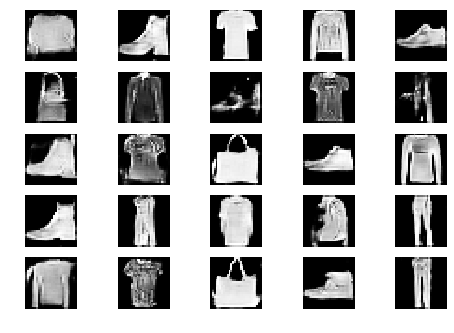

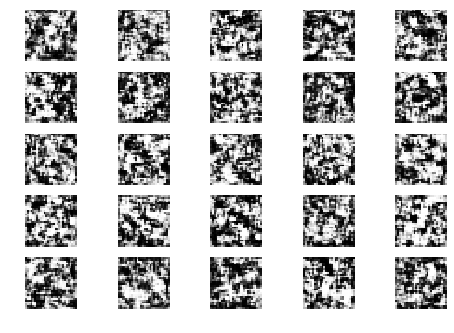

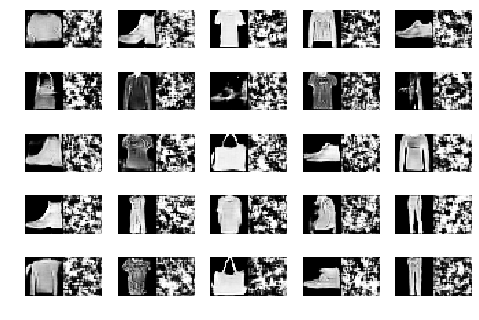

Epoch 0 Batch 1/1875 [D loss: 0.790053, acc.: 50.00%] [G loss: 0.712898]
Epoch 0 Batch 2/1875 [D loss: 0.593574, acc.: 68.75%] [G loss: 1.040367]
Epoch 0 Batch 3/1875 [D loss: 0.517772, acc.: 75.00%] [G loss: 1.211173]
Epoch 0 Batch 4/1875 [D loss: 0.383959, acc.: 93.75%] [G loss: 1.423827]
Epoch 0 Batch 5/1875 [D loss: 0.402678, acc.: 87.50%] [G loss: 1.585190]
Epoch 0 Batch 6/1875 [D loss: 0.356076, acc.: 87.50%] [G loss: 1.896405]
Epoch 0 Batch 7/1875 [D loss: 0.324343, acc.: 87.50%] [G loss: 1.880445]
Epoch 0 Batch 8/1875 [D loss: 0.204676, acc.: 96.88%] [G loss: 2.143834]
Epoch 0 Batch 9/1875 [D loss: 0.433659, acc.: 81.25%] [G loss: 1.935074]
Epoch 0 Batch 10/1875 [D loss: 0.226654, acc.: 100.00%] [G loss: 2.510127]
Epoch 0 Batch 11/1875 [D loss: 0.123336, acc.: 100.00%] [G loss: 2.423934]
Epoch 0 Batch 12/1875 [D loss: 0.249695, acc.: 90.62%] [G loss: 2.577491]
Epoch 0 Batch 13/1875 [D loss: 0.345225, acc.: 93.75%] [G loss: 2.237734]
Epoch 0 Batch 14/1875 [D loss: 0.255824, acc.

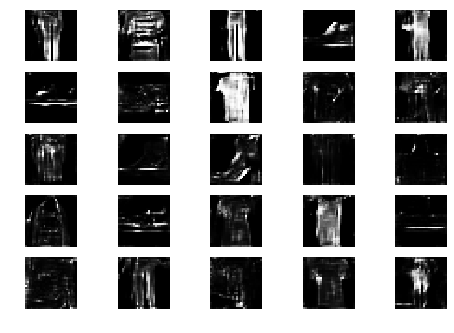

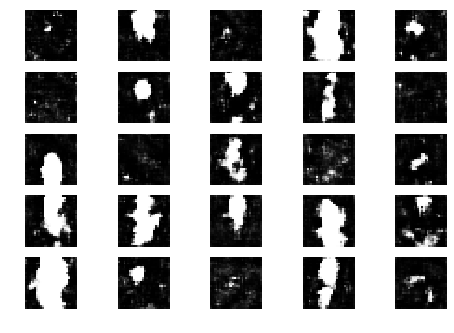

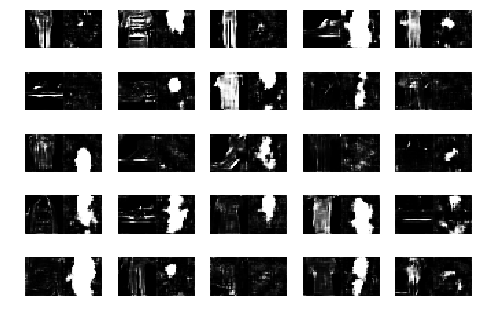

Epoch 0 Batch 101/1875 [D loss: 0.723779, acc.: 59.38%] [G loss: 1.786274]
Epoch 0 Batch 102/1875 [D loss: 0.418477, acc.: 81.25%] [G loss: 1.912294]
Epoch 0 Batch 103/1875 [D loss: 0.645971, acc.: 68.75%] [G loss: 2.976584]
Epoch 0 Batch 104/1875 [D loss: 0.515365, acc.: 78.12%] [G loss: 2.600397]
Epoch 0 Batch 105/1875 [D loss: 0.651294, acc.: 65.62%] [G loss: 2.472650]
Epoch 0 Batch 106/1875 [D loss: 0.723650, acc.: 65.62%] [G loss: 2.295932]
Epoch 0 Batch 107/1875 [D loss: 0.393406, acc.: 78.12%] [G loss: 2.141651]
Epoch 0 Batch 108/1875 [D loss: 0.556836, acc.: 71.88%] [G loss: 2.665696]
Epoch 0 Batch 109/1875 [D loss: 0.475008, acc.: 71.88%] [G loss: 1.930137]
Epoch 0 Batch 110/1875 [D loss: 0.224338, acc.: 90.62%] [G loss: 2.649235]
Epoch 0 Batch 111/1875 [D loss: 0.276237, acc.: 93.75%] [G loss: 3.007600]
Epoch 0 Batch 112/1875 [D loss: 0.671459, acc.: 65.62%] [G loss: 2.537943]
Epoch 0 Batch 113/1875 [D loss: 0.398314, acc.: 78.12%] [G loss: 2.610744]
Epoch 0 Batch 114/1875 [D

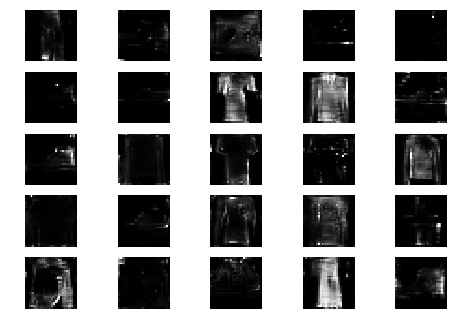

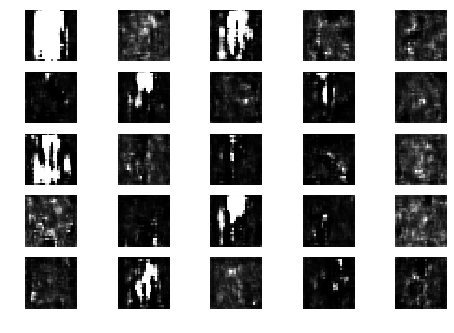

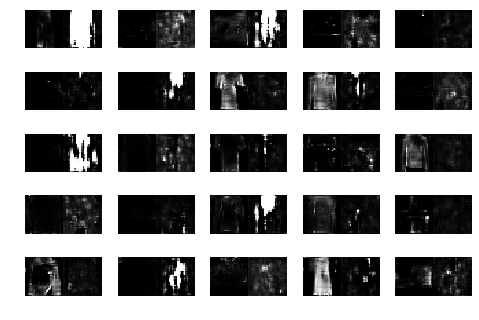

Epoch 0 Batch 201/1875 [D loss: 0.971061, acc.: 46.88%] [G loss: 2.279705]
Epoch 0 Batch 202/1875 [D loss: 0.218203, acc.: 93.75%] [G loss: 2.560711]
Epoch 0 Batch 203/1875 [D loss: 0.439025, acc.: 87.50%] [G loss: 2.721648]
Epoch 0 Batch 204/1875 [D loss: 0.445676, acc.: 78.12%] [G loss: 2.525253]
Epoch 0 Batch 205/1875 [D loss: 1.254822, acc.: 40.62%] [G loss: 1.896401]
Epoch 0 Batch 206/1875 [D loss: 0.413745, acc.: 75.00%] [G loss: 2.056977]
Epoch 0 Batch 207/1875 [D loss: 0.510334, acc.: 71.88%] [G loss: 1.530502]
Epoch 0 Batch 208/1875 [D loss: 0.660788, acc.: 56.25%] [G loss: 1.250006]
Epoch 0 Batch 209/1875 [D loss: 1.189093, acc.: 28.12%] [G loss: 1.770409]
Epoch 0 Batch 210/1875 [D loss: 0.371222, acc.: 81.25%] [G loss: 2.260858]
Epoch 0 Batch 211/1875 [D loss: 0.859412, acc.: 50.00%] [G loss: 1.566145]
Epoch 0 Batch 212/1875 [D loss: 0.722526, acc.: 50.00%] [G loss: 1.742424]
Epoch 0 Batch 213/1875 [D loss: 0.613102, acc.: 68.75%] [G loss: 1.929624]
Epoch 0 Batch 214/1875 [D

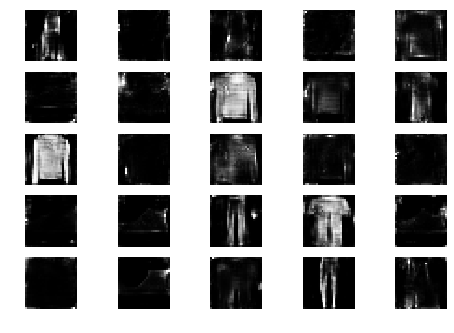

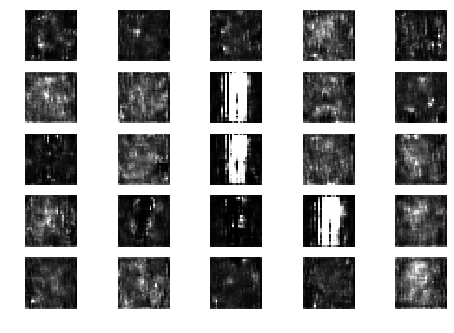

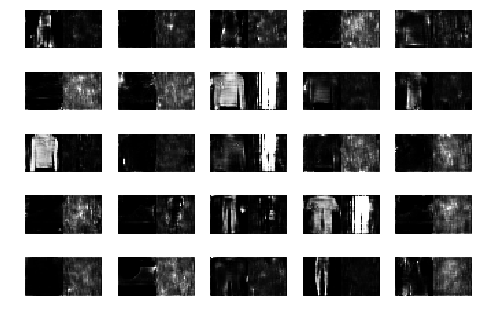

Epoch 0 Batch 301/1875 [D loss: 0.328829, acc.: 93.75%] [G loss: 2.156141]
Epoch 0 Batch 302/1875 [D loss: 0.610684, acc.: 62.50%] [G loss: 2.125693]
Epoch 0 Batch 303/1875 [D loss: 0.827500, acc.: 56.25%] [G loss: 1.371624]
Epoch 0 Batch 304/1875 [D loss: 0.824288, acc.: 53.12%] [G loss: 1.211537]
Epoch 0 Batch 305/1875 [D loss: 0.644799, acc.: 46.88%] [G loss: 2.263060]
Epoch 0 Batch 306/1875 [D loss: 0.444809, acc.: 78.12%] [G loss: 1.586245]
Epoch 0 Batch 307/1875 [D loss: 0.704439, acc.: 59.38%] [G loss: 2.110099]
Epoch 0 Batch 308/1875 [D loss: 0.644456, acc.: 56.25%] [G loss: 2.059431]
Epoch 0 Batch 309/1875 [D loss: 0.722127, acc.: 59.38%] [G loss: 1.530794]
Epoch 0 Batch 310/1875 [D loss: 0.500731, acc.: 71.88%] [G loss: 1.585534]
Epoch 0 Batch 311/1875 [D loss: 0.649684, acc.: 71.88%] [G loss: 1.492319]
Epoch 0 Batch 312/1875 [D loss: 0.913113, acc.: 34.38%] [G loss: 1.783256]
Epoch 0 Batch 313/1875 [D loss: 0.614012, acc.: 71.88%] [G loss: 2.185650]
Epoch 0 Batch 314/1875 [D

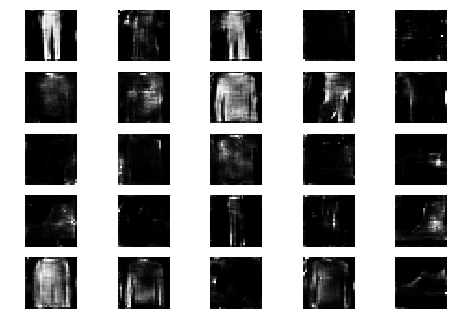

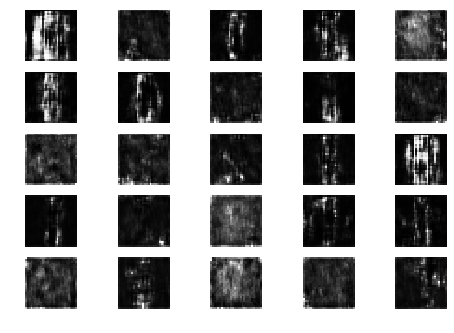

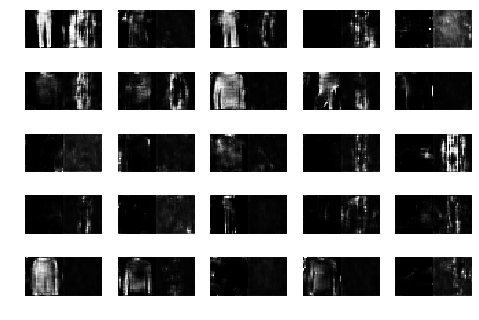

Epoch 0 Batch 401/1875 [D loss: 0.718397, acc.: 62.50%] [G loss: 1.797593]
Epoch 0 Batch 402/1875 [D loss: 0.582167, acc.: 71.88%] [G loss: 1.774414]
Epoch 0 Batch 403/1875 [D loss: 0.451683, acc.: 75.00%] [G loss: 1.627490]
Epoch 0 Batch 404/1875 [D loss: 0.597889, acc.: 65.62%] [G loss: 1.508956]
Epoch 0 Batch 405/1875 [D loss: 0.720076, acc.: 56.25%] [G loss: 1.217473]
Epoch 0 Batch 406/1875 [D loss: 0.682345, acc.: 46.88%] [G loss: 1.526457]
Epoch 0 Batch 407/1875 [D loss: 0.952776, acc.: 46.88%] [G loss: 1.610072]
Epoch 0 Batch 408/1875 [D loss: 0.540381, acc.: 81.25%] [G loss: 1.178460]
Epoch 0 Batch 409/1875 [D loss: 1.051022, acc.: 40.62%] [G loss: 1.108331]
Epoch 0 Batch 410/1875 [D loss: 0.718808, acc.: 59.38%] [G loss: 1.457846]
Epoch 0 Batch 411/1875 [D loss: 0.888987, acc.: 43.75%] [G loss: 1.303176]
Epoch 0 Batch 412/1875 [D loss: 0.702327, acc.: 65.62%] [G loss: 1.672491]
Epoch 0 Batch 413/1875 [D loss: 0.834801, acc.: 65.62%] [G loss: 1.189172]
Epoch 0 Batch 414/1875 [D

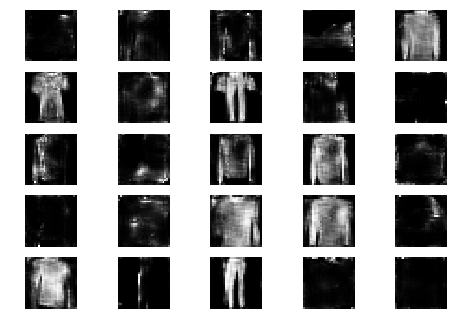

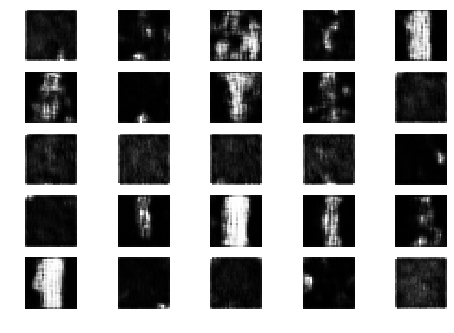

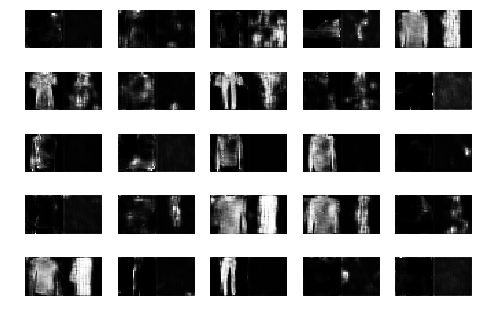

Epoch 0 Batch 501/1875 [D loss: 0.864942, acc.: 59.38%] [G loss: 1.503241]
Epoch 0 Batch 502/1875 [D loss: 0.745120, acc.: 56.25%] [G loss: 2.051296]
Epoch 0 Batch 503/1875 [D loss: 0.793556, acc.: 56.25%] [G loss: 1.343179]
Epoch 0 Batch 504/1875 [D loss: 0.725903, acc.: 62.50%] [G loss: 1.245799]
Epoch 0 Batch 505/1875 [D loss: 0.737823, acc.: 53.12%] [G loss: 1.402816]
Epoch 0 Batch 506/1875 [D loss: 0.701358, acc.: 59.38%] [G loss: 1.474991]
Epoch 0 Batch 507/1875 [D loss: 0.725029, acc.: 62.50%] [G loss: 1.249814]
Epoch 0 Batch 508/1875 [D loss: 0.576392, acc.: 65.62%] [G loss: 1.706400]
Epoch 0 Batch 509/1875 [D loss: 0.818636, acc.: 56.25%] [G loss: 1.459821]
Epoch 0 Batch 510/1875 [D loss: 1.539009, acc.: 21.88%] [G loss: 1.022896]
Epoch 0 Batch 511/1875 [D loss: 0.896210, acc.: 53.12%] [G loss: 0.791765]
Epoch 0 Batch 512/1875 [D loss: 0.990422, acc.: 37.50%] [G loss: 1.377986]
Epoch 0 Batch 513/1875 [D loss: 0.748827, acc.: 59.38%] [G loss: 1.143098]
Epoch 0 Batch 514/1875 [D

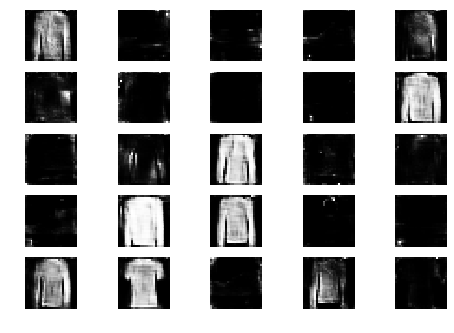

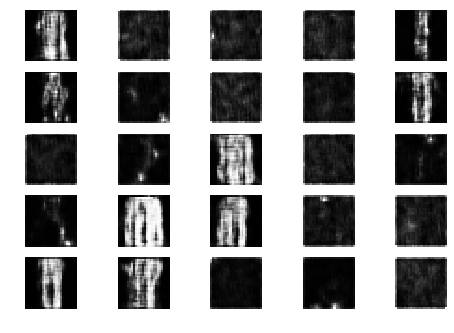

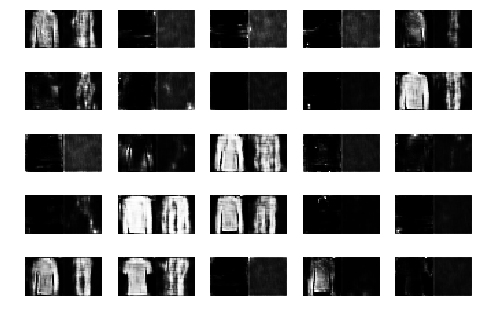

Epoch 0 Batch 601/1875 [D loss: 0.616799, acc.: 68.75%] [G loss: 1.274468]
Epoch 0 Batch 602/1875 [D loss: 0.730629, acc.: 56.25%] [G loss: 1.388593]
Epoch 0 Batch 603/1875 [D loss: 0.696981, acc.: 56.25%] [G loss: 1.309457]
Epoch 0 Batch 604/1875 [D loss: 0.671018, acc.: 75.00%] [G loss: 1.348737]
Epoch 0 Batch 605/1875 [D loss: 0.573613, acc.: 68.75%] [G loss: 1.346140]
Epoch 0 Batch 606/1875 [D loss: 0.780763, acc.: 65.62%] [G loss: 1.269727]
Epoch 0 Batch 607/1875 [D loss: 0.626225, acc.: 65.62%] [G loss: 0.839836]
Epoch 0 Batch 608/1875 [D loss: 0.739418, acc.: 46.88%] [G loss: 1.114510]
Epoch 0 Batch 609/1875 [D loss: 0.536159, acc.: 68.75%] [G loss: 1.150428]
Epoch 0 Batch 610/1875 [D loss: 0.951940, acc.: 37.50%] [G loss: 1.558585]
Epoch 0 Batch 611/1875 [D loss: 0.530893, acc.: 75.00%] [G loss: 1.315318]
Epoch 0 Batch 612/1875 [D loss: 1.175317, acc.: 15.62%] [G loss: 1.217664]
Epoch 0 Batch 613/1875 [D loss: 0.482234, acc.: 81.25%] [G loss: 1.328011]
Epoch 0 Batch 614/1875 [D

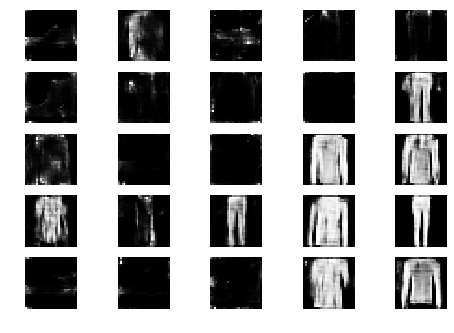

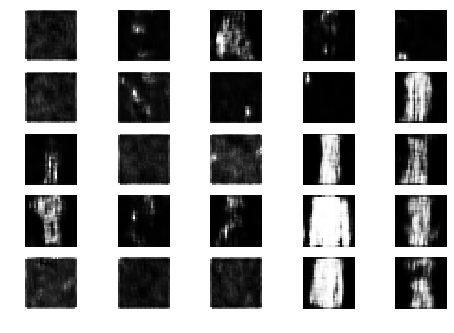

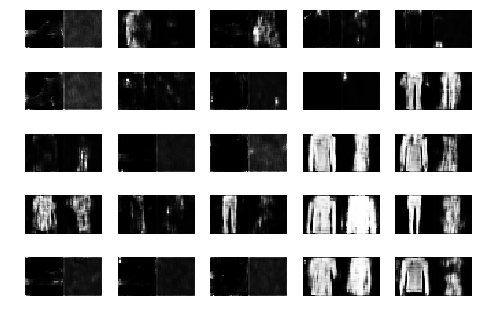

Epoch 0 Batch 701/1875 [D loss: 0.814615, acc.: 46.88%] [G loss: 1.936024]
Epoch 0 Batch 702/1875 [D loss: 0.504645, acc.: 71.88%] [G loss: 1.438856]
Epoch 0 Batch 703/1875 [D loss: 0.711704, acc.: 75.00%] [G loss: 1.278917]
Epoch 0 Batch 704/1875 [D loss: 0.507280, acc.: 68.75%] [G loss: 1.751676]
Epoch 0 Batch 705/1875 [D loss: 0.867418, acc.: 53.12%] [G loss: 1.235397]
Epoch 0 Batch 706/1875 [D loss: 0.737757, acc.: 56.25%] [G loss: 1.201532]
Epoch 0 Batch 707/1875 [D loss: 0.656574, acc.: 53.12%] [G loss: 1.170687]
Epoch 0 Batch 708/1875 [D loss: 0.979204, acc.: 40.62%] [G loss: 1.310269]
Epoch 0 Batch 709/1875 [D loss: 0.887823, acc.: 50.00%] [G loss: 1.223358]
Epoch 0 Batch 710/1875 [D loss: 0.713975, acc.: 56.25%] [G loss: 1.397076]
Epoch 0 Batch 711/1875 [D loss: 0.609895, acc.: 68.75%] [G loss: 1.287779]
Epoch 0 Batch 712/1875 [D loss: 0.729032, acc.: 43.75%] [G loss: 0.800340]
Epoch 0 Batch 713/1875 [D loss: 0.680367, acc.: 53.12%] [G loss: 1.212714]
Epoch 0 Batch 714/1875 [D

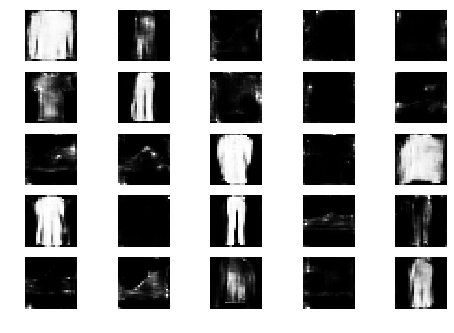

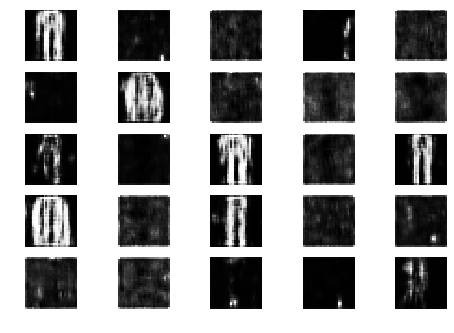

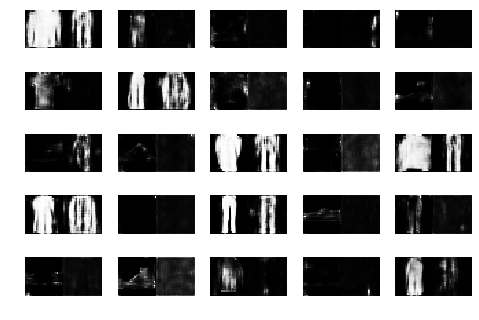

Epoch 0 Batch 801/1875 [D loss: 0.812203, acc.: 59.38%] [G loss: 1.222237]
Epoch 0 Batch 802/1875 [D loss: 0.501118, acc.: 81.25%] [G loss: 1.766379]
Epoch 0 Batch 803/1875 [D loss: 0.805929, acc.: 43.75%] [G loss: 1.277541]
Epoch 0 Batch 804/1875 [D loss: 0.730212, acc.: 56.25%] [G loss: 1.433101]
Epoch 0 Batch 805/1875 [D loss: 0.846546, acc.: 37.50%] [G loss: 1.421387]
Epoch 0 Batch 806/1875 [D loss: 0.798248, acc.: 46.88%] [G loss: 1.310312]
Epoch 0 Batch 807/1875 [D loss: 0.707871, acc.: 50.00%] [G loss: 1.249204]
Epoch 0 Batch 808/1875 [D loss: 0.576517, acc.: 68.75%] [G loss: 0.801031]
Epoch 0 Batch 809/1875 [D loss: 1.047118, acc.: 28.12%] [G loss: 1.100718]
Epoch 0 Batch 810/1875 [D loss: 0.778069, acc.: 46.88%] [G loss: 1.064121]
Epoch 0 Batch 811/1875 [D loss: 0.584348, acc.: 75.00%] [G loss: 1.378529]
Epoch 0 Batch 812/1875 [D loss: 0.738637, acc.: 46.88%] [G loss: 1.574603]
Epoch 0 Batch 813/1875 [D loss: 0.458516, acc.: 81.25%] [G loss: 1.434911]
Epoch 0 Batch 814/1875 [D

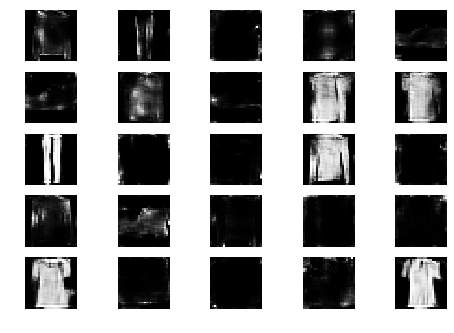

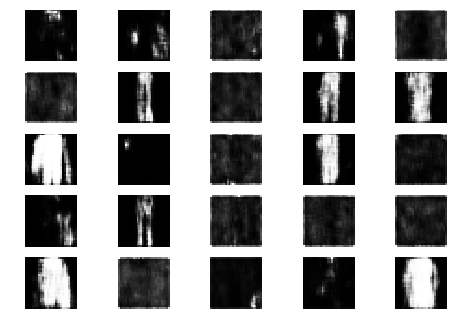

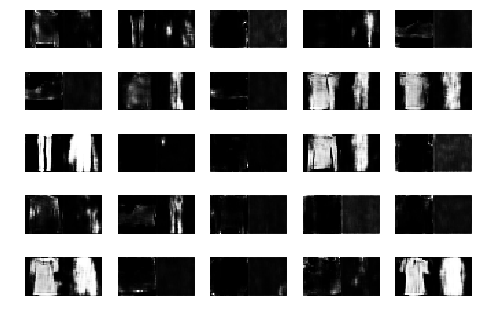

Epoch 0 Batch 901/1875 [D loss: 0.626146, acc.: 65.62%] [G loss: 0.890365]
Epoch 0 Batch 902/1875 [D loss: 0.773586, acc.: 56.25%] [G loss: 0.902233]
Epoch 0 Batch 903/1875 [D loss: 0.643232, acc.: 53.12%] [G loss: 0.921950]
Epoch 0 Batch 904/1875 [D loss: 0.655823, acc.: 59.38%] [G loss: 1.324754]
Epoch 0 Batch 905/1875 [D loss: 0.638728, acc.: 62.50%] [G loss: 1.283088]
Epoch 0 Batch 906/1875 [D loss: 0.648285, acc.: 62.50%] [G loss: 1.046499]
Epoch 0 Batch 907/1875 [D loss: 0.749419, acc.: 43.75%] [G loss: 1.161378]
Epoch 0 Batch 908/1875 [D loss: 0.720574, acc.: 68.75%] [G loss: 1.184888]
Epoch 0 Batch 909/1875 [D loss: 0.848302, acc.: 40.62%] [G loss: 1.500322]
Epoch 0 Batch 910/1875 [D loss: 0.559242, acc.: 81.25%] [G loss: 1.338051]
Epoch 0 Batch 911/1875 [D loss: 0.950666, acc.: 31.25%] [G loss: 1.198151]
Epoch 0 Batch 912/1875 [D loss: 0.762447, acc.: 46.88%] [G loss: 1.198869]
Epoch 0 Batch 913/1875 [D loss: 0.558640, acc.: 62.50%] [G loss: 1.058847]
Epoch 0 Batch 914/1875 [D

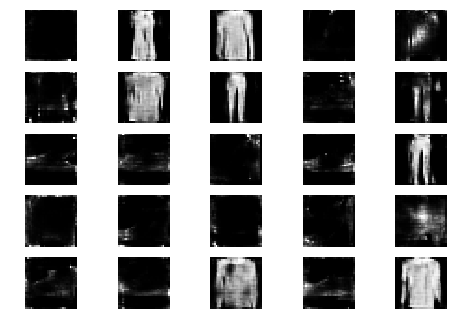

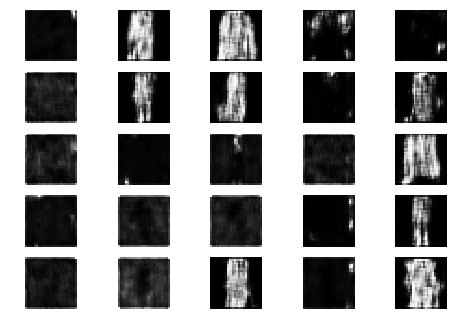

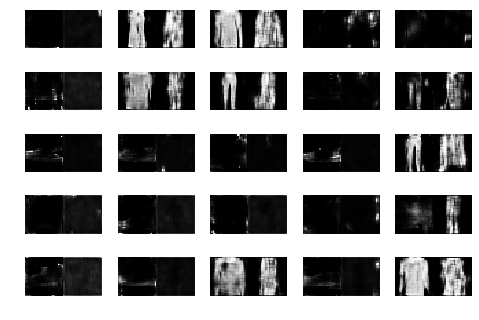

Epoch 0 Batch 1001/1875 [D loss: 0.567611, acc.: 71.88%] [G loss: 2.174833]
Epoch 0 Batch 1002/1875 [D loss: 0.564225, acc.: 71.88%] [G loss: 1.266469]
Epoch 0 Batch 1003/1875 [D loss: 0.751424, acc.: 59.38%] [G loss: 1.406234]
Epoch 0 Batch 1004/1875 [D loss: 0.681012, acc.: 62.50%] [G loss: 1.331449]
Epoch 0 Batch 1005/1875 [D loss: 0.659085, acc.: 59.38%] [G loss: 1.471367]
Epoch 0 Batch 1006/1875 [D loss: 0.653784, acc.: 65.62%] [G loss: 1.378695]
Epoch 0 Batch 1007/1875 [D loss: 0.901826, acc.: 37.50%] [G loss: 0.928873]
Epoch 0 Batch 1008/1875 [D loss: 0.549033, acc.: 68.75%] [G loss: 1.143918]
Epoch 0 Batch 1009/1875 [D loss: 0.743738, acc.: 50.00%] [G loss: 1.344020]
Epoch 0 Batch 1010/1875 [D loss: 0.583430, acc.: 62.50%] [G loss: 1.154293]
Epoch 0 Batch 1011/1875 [D loss: 0.905075, acc.: 37.50%] [G loss: 1.055330]
Epoch 0 Batch 1012/1875 [D loss: 0.746559, acc.: 56.25%] [G loss: 0.992691]
Epoch 0 Batch 1013/1875 [D loss: 0.612684, acc.: 65.62%] [G loss: 1.405855]
Epoch 0 Batc

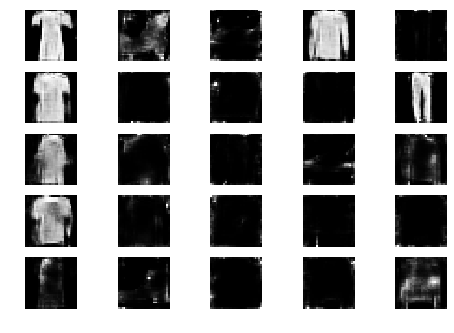

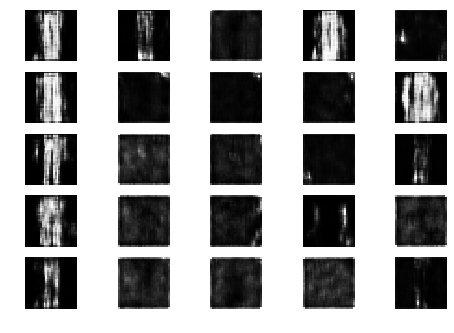

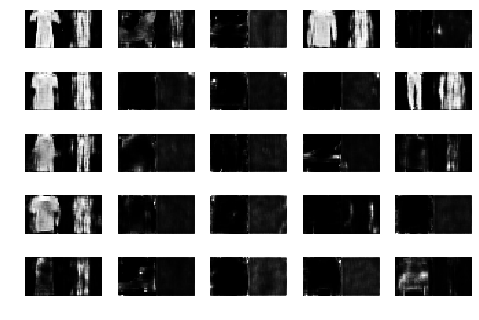

Epoch 0 Batch 1101/1875 [D loss: 0.642447, acc.: 71.88%] [G loss: 1.112875]
Epoch 0 Batch 1102/1875 [D loss: 0.719295, acc.: 65.62%] [G loss: 1.244140]
Epoch 0 Batch 1103/1875 [D loss: 0.580642, acc.: 71.88%] [G loss: 0.986782]
Epoch 0 Batch 1104/1875 [D loss: 0.742137, acc.: 50.00%] [G loss: 1.228282]
Epoch 0 Batch 1105/1875 [D loss: 0.567559, acc.: 68.75%] [G loss: 1.319886]
Epoch 0 Batch 1106/1875 [D loss: 1.118643, acc.: 21.88%] [G loss: 1.263906]
Epoch 0 Batch 1107/1875 [D loss: 0.651967, acc.: 65.62%] [G loss: 1.634016]
Epoch 0 Batch 1108/1875 [D loss: 0.596778, acc.: 65.62%] [G loss: 1.255982]
Epoch 0 Batch 1109/1875 [D loss: 0.760333, acc.: 56.25%] [G loss: 1.107105]
Epoch 0 Batch 1110/1875 [D loss: 0.711053, acc.: 50.00%] [G loss: 1.018126]
Epoch 0 Batch 1111/1875 [D loss: 0.747802, acc.: 62.50%] [G loss: 1.424938]
Epoch 0 Batch 1112/1875 [D loss: 0.758111, acc.: 46.88%] [G loss: 1.461300]
Epoch 0 Batch 1113/1875 [D loss: 0.684651, acc.: 43.75%] [G loss: 1.365164]
Epoch 0 Batc

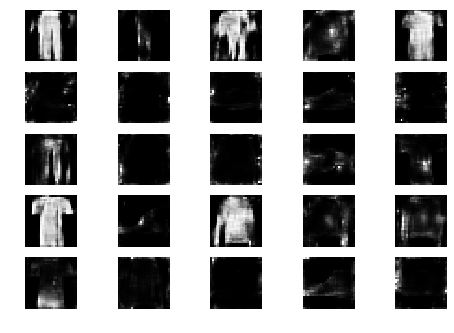

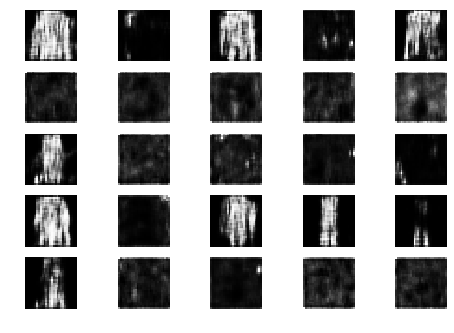

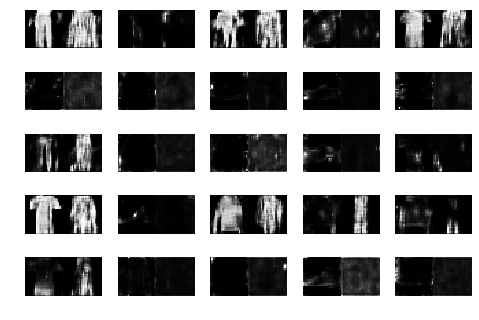

Epoch 0 Batch 1201/1875 [D loss: 0.632829, acc.: 56.25%] [G loss: 1.316690]
Epoch 0 Batch 1202/1875 [D loss: 0.645870, acc.: 59.38%] [G loss: 0.887296]
Epoch 0 Batch 1203/1875 [D loss: 0.710538, acc.: 56.25%] [G loss: 1.184741]
Epoch 0 Batch 1204/1875 [D loss: 0.617891, acc.: 62.50%] [G loss: 1.220321]
Epoch 0 Batch 1205/1875 [D loss: 0.612788, acc.: 59.38%] [G loss: 1.002402]
Epoch 0 Batch 1206/1875 [D loss: 0.630779, acc.: 78.12%] [G loss: 1.099737]
Epoch 0 Batch 1207/1875 [D loss: 0.536072, acc.: 68.75%] [G loss: 1.297771]
Epoch 0 Batch 1208/1875 [D loss: 0.751773, acc.: 43.75%] [G loss: 0.951561]
Epoch 0 Batch 1209/1875 [D loss: 0.495505, acc.: 78.12%] [G loss: 1.130659]
Epoch 0 Batch 1210/1875 [D loss: 0.709395, acc.: 62.50%] [G loss: 0.877983]
Epoch 0 Batch 1211/1875 [D loss: 0.466866, acc.: 81.25%] [G loss: 1.095211]
Epoch 0 Batch 1212/1875 [D loss: 0.390823, acc.: 87.50%] [G loss: 1.046104]
Epoch 0 Batch 1213/1875 [D loss: 0.427514, acc.: 87.50%] [G loss: 0.996803]
Epoch 0 Batc

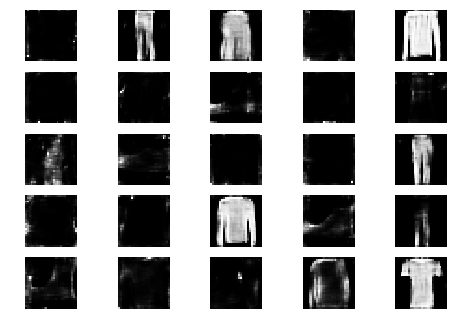

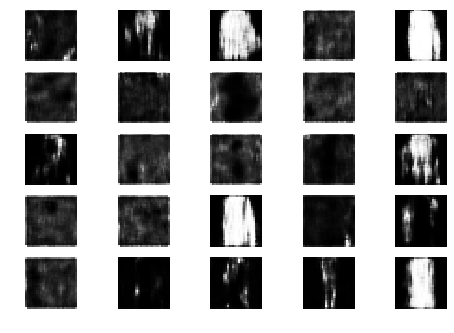

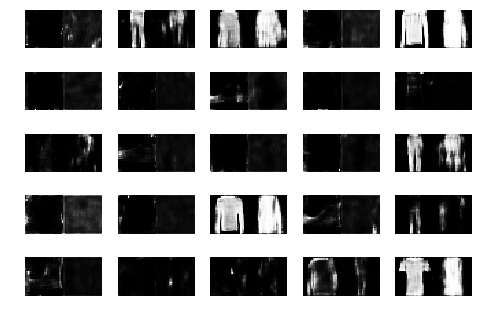

Epoch 0 Batch 1301/1875 [D loss: 0.615243, acc.: 62.50%] [G loss: 1.273454]
Epoch 0 Batch 1302/1875 [D loss: 0.905242, acc.: 46.88%] [G loss: 1.035714]
Epoch 0 Batch 1303/1875 [D loss: 0.710343, acc.: 59.38%] [G loss: 1.469534]
Epoch 0 Batch 1304/1875 [D loss: 0.663257, acc.: 65.62%] [G loss: 1.427782]
Epoch 0 Batch 1305/1875 [D loss: 0.531097, acc.: 81.25%] [G loss: 1.106859]
Epoch 0 Batch 1306/1875 [D loss: 0.666016, acc.: 62.50%] [G loss: 0.932638]
Epoch 0 Batch 1307/1875 [D loss: 0.751695, acc.: 53.12%] [G loss: 0.970722]
Epoch 0 Batch 1308/1875 [D loss: 0.600596, acc.: 71.88%] [G loss: 1.555428]
Epoch 0 Batch 1309/1875 [D loss: 0.559040, acc.: 71.88%] [G loss: 1.045907]
Epoch 0 Batch 1310/1875 [D loss: 0.631071, acc.: 56.25%] [G loss: 0.779138]
Epoch 0 Batch 1311/1875 [D loss: 0.631046, acc.: 59.38%] [G loss: 0.996094]
Epoch 0 Batch 1312/1875 [D loss: 0.590037, acc.: 71.88%] [G loss: 1.072005]
Epoch 0 Batch 1313/1875 [D loss: 0.557300, acc.: 75.00%] [G loss: 1.492929]
Epoch 0 Batc

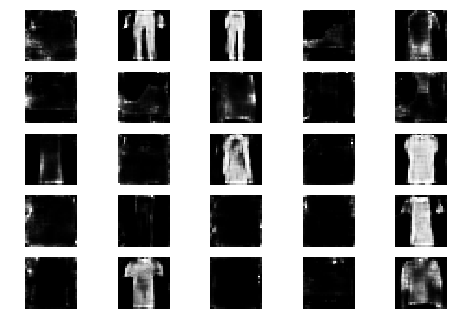

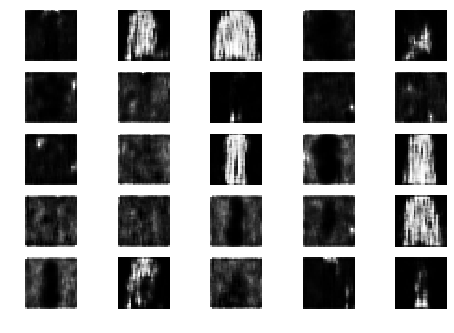

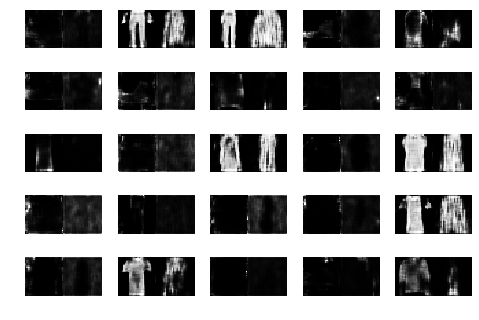

Epoch 0 Batch 1401/1875 [D loss: 0.804778, acc.: 46.88%] [G loss: 1.030132]
Epoch 0 Batch 1402/1875 [D loss: 0.772459, acc.: 40.62%] [G loss: 1.310495]
Epoch 0 Batch 1403/1875 [D loss: 0.647037, acc.: 62.50%] [G loss: 1.181762]
Epoch 0 Batch 1404/1875 [D loss: 0.852860, acc.: 50.00%] [G loss: 0.920845]
Epoch 0 Batch 1405/1875 [D loss: 0.744112, acc.: 62.50%] [G loss: 1.248072]
Epoch 0 Batch 1406/1875 [D loss: 0.456570, acc.: 84.38%] [G loss: 1.330999]
Epoch 0 Batch 1407/1875 [D loss: 0.662321, acc.: 62.50%] [G loss: 0.992615]
Epoch 0 Batch 1408/1875 [D loss: 0.787562, acc.: 37.50%] [G loss: 1.140998]
Epoch 0 Batch 1409/1875 [D loss: 0.710827, acc.: 59.38%] [G loss: 1.105057]
Epoch 0 Batch 1410/1875 [D loss: 0.830235, acc.: 40.62%] [G loss: 1.371231]
Epoch 0 Batch 1411/1875 [D loss: 0.519015, acc.: 78.12%] [G loss: 1.024619]
Epoch 0 Batch 1412/1875 [D loss: 0.853791, acc.: 40.62%] [G loss: 1.306105]
Epoch 0 Batch 1413/1875 [D loss: 0.650915, acc.: 62.50%] [G loss: 1.048305]
Epoch 0 Batc

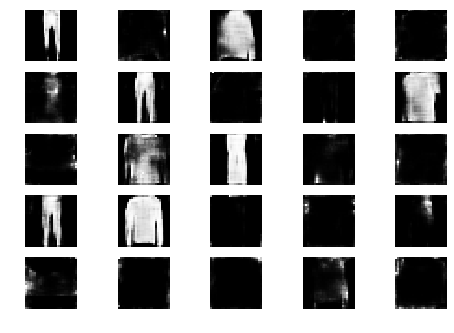

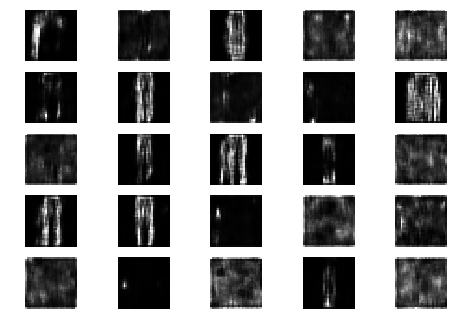

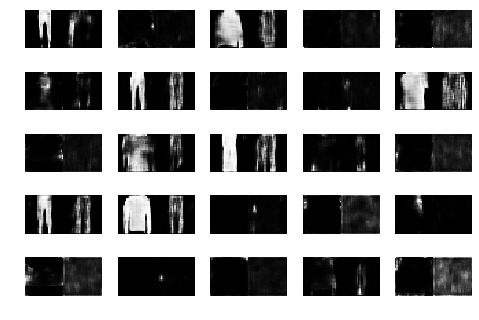

Epoch 0 Batch 1501/1875 [D loss: 0.607993, acc.: 78.12%] [G loss: 0.794940]
Epoch 0 Batch 1502/1875 [D loss: 0.565377, acc.: 75.00%] [G loss: 1.484518]
Epoch 0 Batch 1503/1875 [D loss: 0.616133, acc.: 59.38%] [G loss: 1.080696]
Epoch 0 Batch 1504/1875 [D loss: 0.870828, acc.: 46.88%] [G loss: 0.720058]
Epoch 0 Batch 1505/1875 [D loss: 0.621796, acc.: 59.38%] [G loss: 0.645789]
Epoch 0 Batch 1506/1875 [D loss: 0.730741, acc.: 56.25%] [G loss: 0.980433]
Epoch 0 Batch 1507/1875 [D loss: 0.735099, acc.: 46.88%] [G loss: 0.974624]
Epoch 0 Batch 1508/1875 [D loss: 0.573706, acc.: 75.00%] [G loss: 1.240348]
Epoch 0 Batch 1509/1875 [D loss: 0.673819, acc.: 53.12%] [G loss: 0.755890]
Epoch 0 Batch 1510/1875 [D loss: 0.877476, acc.: 31.25%] [G loss: 1.068923]
Epoch 0 Batch 1511/1875 [D loss: 0.505603, acc.: 84.38%] [G loss: 0.949323]
Epoch 0 Batch 1512/1875 [D loss: 1.354783, acc.: 15.62%] [G loss: 1.057098]
Epoch 0 Batch 1513/1875 [D loss: 0.583517, acc.: 75.00%] [G loss: 0.848877]
Epoch 0 Batc

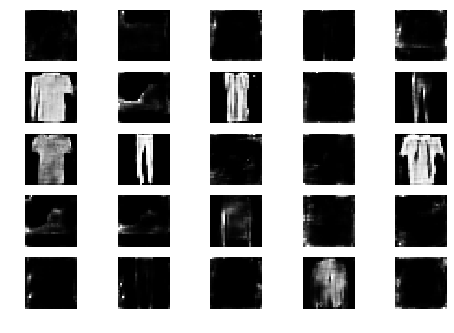

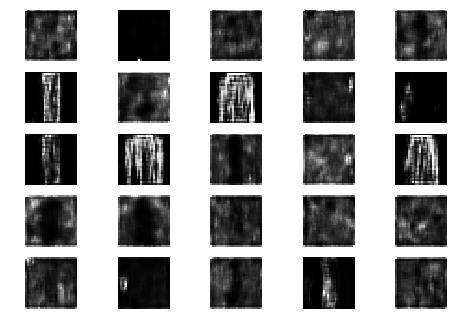

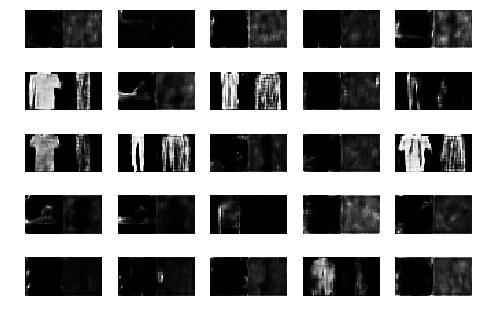

Epoch 0 Batch 1601/1875 [D loss: 0.485621, acc.: 75.00%] [G loss: 1.287635]
Epoch 0 Batch 1602/1875 [D loss: 0.749091, acc.: 56.25%] [G loss: 1.041961]
Epoch 0 Batch 1603/1875 [D loss: 0.735779, acc.: 50.00%] [G loss: 1.031265]
Epoch 0 Batch 1604/1875 [D loss: 0.464254, acc.: 84.38%] [G loss: 1.264712]
Epoch 0 Batch 1605/1875 [D loss: 0.639786, acc.: 56.25%] [G loss: 1.434443]
Epoch 0 Batch 1606/1875 [D loss: 0.493799, acc.: 68.75%] [G loss: 1.108501]
Epoch 0 Batch 1607/1875 [D loss: 0.638825, acc.: 65.62%] [G loss: 1.133296]
Epoch 0 Batch 1608/1875 [D loss: 0.543643, acc.: 75.00%] [G loss: 1.082276]
Epoch 0 Batch 1609/1875 [D loss: 0.474398, acc.: 75.00%] [G loss: 1.138406]
Epoch 0 Batch 1610/1875 [D loss: 0.423095, acc.: 84.38%] [G loss: 1.026578]
Epoch 0 Batch 1611/1875 [D loss: 0.495564, acc.: 68.75%] [G loss: 1.427708]
Epoch 0 Batch 1612/1875 [D loss: 0.588532, acc.: 68.75%] [G loss: 1.224502]
Epoch 0 Batch 1613/1875 [D loss: 0.521008, acc.: 75.00%] [G loss: 0.911908]
Epoch 0 Batc

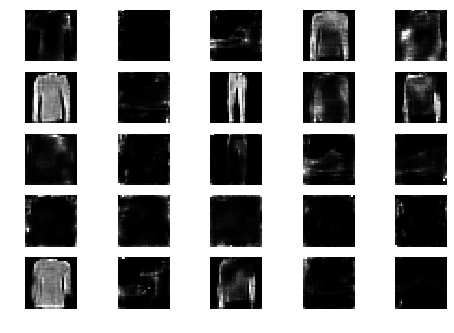

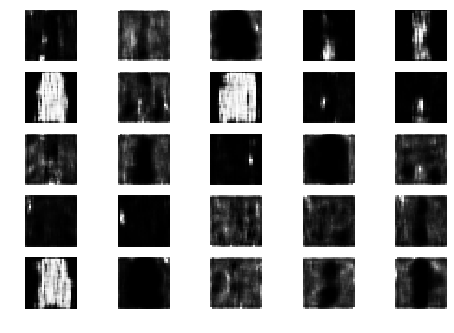

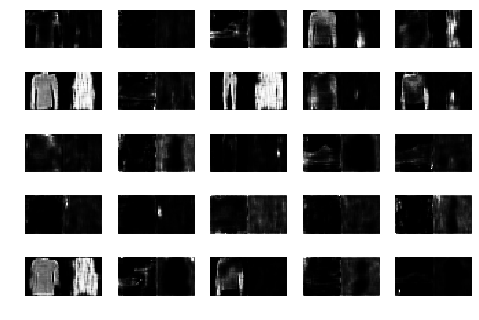

Epoch 0 Batch 1701/1875 [D loss: 0.595771, acc.: 56.25%] [G loss: 0.876664]
Epoch 0 Batch 1702/1875 [D loss: 0.722103, acc.: 56.25%] [G loss: 1.677605]
Epoch 0 Batch 1703/1875 [D loss: 0.641530, acc.: 62.50%] [G loss: 1.452134]
Epoch 0 Batch 1704/1875 [D loss: 0.633004, acc.: 56.25%] [G loss: 0.800339]
Epoch 0 Batch 1705/1875 [D loss: 0.722049, acc.: 40.62%] [G loss: 1.368855]
Epoch 0 Batch 1706/1875 [D loss: 0.475230, acc.: 78.12%] [G loss: 0.941167]
Epoch 0 Batch 1707/1875 [D loss: 0.503823, acc.: 78.12%] [G loss: 1.081178]
Epoch 0 Batch 1708/1875 [D loss: 0.417080, acc.: 84.38%] [G loss: 1.197141]
Epoch 0 Batch 1709/1875 [D loss: 0.598852, acc.: 65.62%] [G loss: 1.025050]
Epoch 0 Batch 1710/1875 [D loss: 0.469358, acc.: 81.25%] [G loss: 1.010510]
Epoch 0 Batch 1711/1875 [D loss: 0.536440, acc.: 65.62%] [G loss: 1.471239]
Epoch 0 Batch 1712/1875 [D loss: 0.449918, acc.: 81.25%] [G loss: 1.272095]
Epoch 0 Batch 1713/1875 [D loss: 0.923236, acc.: 21.88%] [G loss: 0.954481]
Epoch 0 Batc

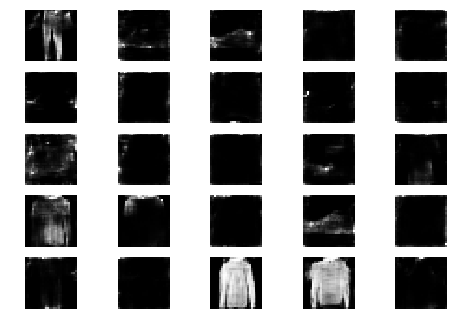

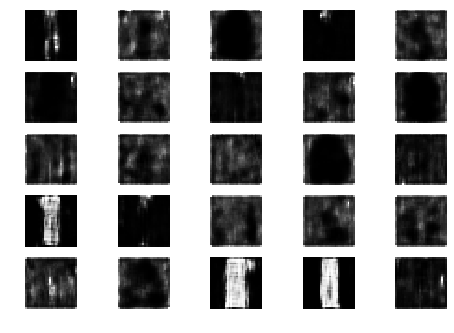

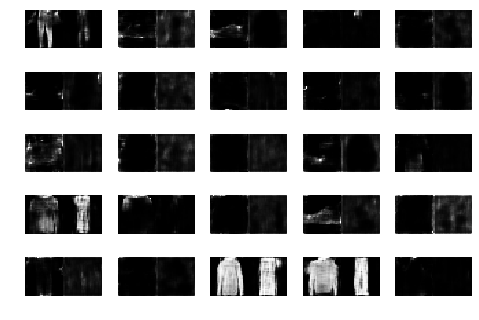

Epoch 0 Batch 1801/1875 [D loss: 0.573080, acc.: 50.00%] [G loss: 1.259755]
Epoch 0 Batch 1802/1875 [D loss: 0.666875, acc.: 53.12%] [G loss: 0.961142]
Epoch 0 Batch 1803/1875 [D loss: 0.573702, acc.: 78.12%] [G loss: 1.636382]
Epoch 0 Batch 1804/1875 [D loss: 0.767462, acc.: 59.38%] [G loss: 1.310433]
Epoch 0 Batch 1805/1875 [D loss: 0.460506, acc.: 87.50%] [G loss: 1.209955]
Epoch 0 Batch 1806/1875 [D loss: 0.800314, acc.: 46.88%] [G loss: 1.013766]
Epoch 0 Batch 1807/1875 [D loss: 0.463362, acc.: 75.00%] [G loss: 0.989246]
Epoch 0 Batch 1808/1875 [D loss: 0.434010, acc.: 93.75%] [G loss: 1.133416]
Epoch 0 Batch 1809/1875 [D loss: 0.784219, acc.: 46.88%] [G loss: 1.179832]
Epoch 0 Batch 1810/1875 [D loss: 0.446905, acc.: 75.00%] [G loss: 1.146951]
Epoch 0 Batch 1811/1875 [D loss: 0.810421, acc.: 50.00%] [G loss: 1.051315]
Epoch 0 Batch 1812/1875 [D loss: 0.521910, acc.: 62.50%] [G loss: 0.879184]
Epoch 0 Batch 1813/1875 [D loss: 0.697930, acc.: 65.62%] [G loss: 0.762837]
Epoch 0 Batc

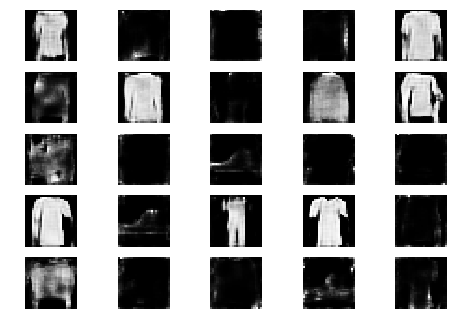

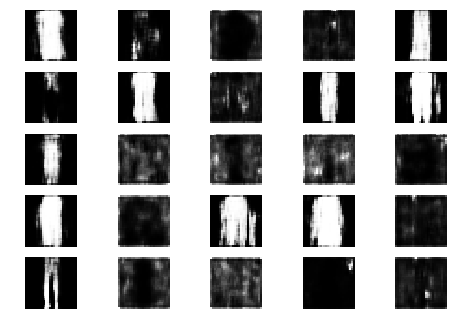

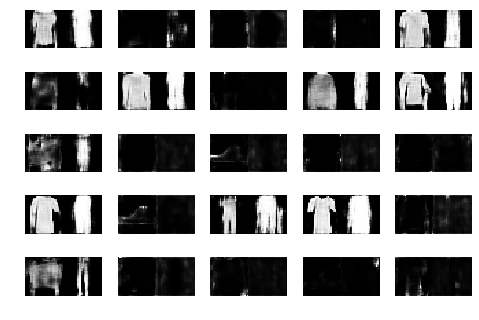

Epoch 1 Batch 1/1875 [D loss: 0.661772, acc.: 50.00%] [G loss: 1.220038]
Epoch 1 Batch 2/1875 [D loss: 0.677789, acc.: 59.38%] [G loss: 1.234154]
Epoch 1 Batch 3/1875 [D loss: 0.564460, acc.: 68.75%] [G loss: 1.043875]
Epoch 1 Batch 4/1875 [D loss: 0.640410, acc.: 71.88%] [G loss: 1.143364]
Epoch 1 Batch 5/1875 [D loss: 0.861648, acc.: 46.88%] [G loss: 0.971978]
Epoch 1 Batch 6/1875 [D loss: 0.569469, acc.: 59.38%] [G loss: 1.196951]
Epoch 1 Batch 7/1875 [D loss: 0.843843, acc.: 50.00%] [G loss: 1.102542]
Epoch 1 Batch 8/1875 [D loss: 0.621927, acc.: 65.62%] [G loss: 1.045927]
Epoch 1 Batch 9/1875 [D loss: 0.533799, acc.: 71.88%] [G loss: 1.344531]
Epoch 1 Batch 10/1875 [D loss: 0.649016, acc.: 62.50%] [G loss: 1.412090]
Epoch 1 Batch 11/1875 [D loss: 0.548333, acc.: 62.50%] [G loss: 1.603025]
Epoch 1 Batch 12/1875 [D loss: 0.609933, acc.: 62.50%] [G loss: 1.303316]
Epoch 1 Batch 13/1875 [D loss: 0.626723, acc.: 56.25%] [G loss: 0.784378]
Epoch 1 Batch 14/1875 [D loss: 0.479309, acc.: 

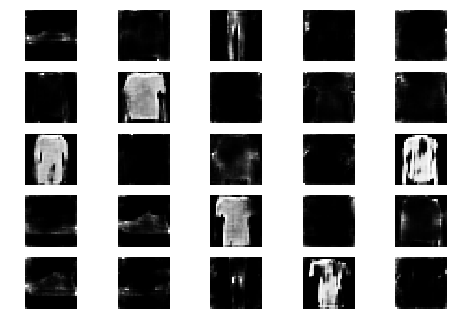

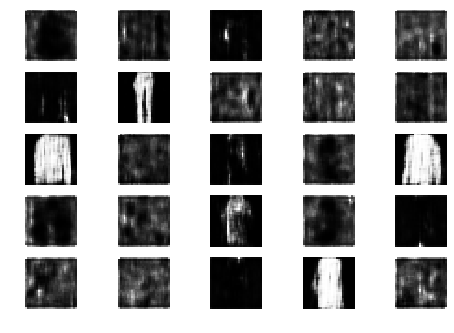

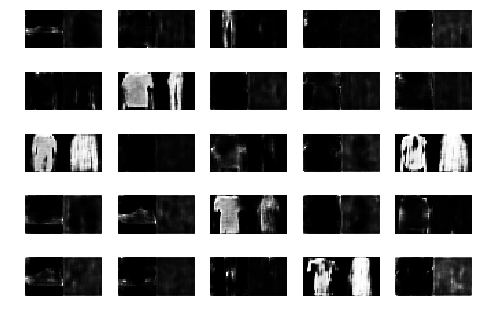

Epoch 1 Batch 101/1875 [D loss: 0.695572, acc.: 68.75%] [G loss: 1.125924]
Epoch 1 Batch 102/1875 [D loss: 0.654221, acc.: 56.25%] [G loss: 1.277363]
Epoch 1 Batch 103/1875 [D loss: 0.799135, acc.: 40.62%] [G loss: 1.089798]
Epoch 1 Batch 104/1875 [D loss: 0.545195, acc.: 75.00%] [G loss: 1.252081]
Epoch 1 Batch 105/1875 [D loss: 0.654617, acc.: 59.38%] [G loss: 1.100345]
Epoch 1 Batch 106/1875 [D loss: 0.716567, acc.: 46.88%] [G loss: 1.000005]
Epoch 1 Batch 107/1875 [D loss: 0.591536, acc.: 59.38%] [G loss: 1.086718]
Epoch 1 Batch 108/1875 [D loss: 0.785713, acc.: 56.25%] [G loss: 1.211142]
Epoch 1 Batch 109/1875 [D loss: 0.623274, acc.: 65.62%] [G loss: 1.688330]
Epoch 1 Batch 110/1875 [D loss: 0.745709, acc.: 53.12%] [G loss: 0.832111]
Epoch 1 Batch 111/1875 [D loss: 0.679827, acc.: 62.50%] [G loss: 0.977604]
Epoch 1 Batch 112/1875 [D loss: 0.630574, acc.: 59.38%] [G loss: 1.065614]
Epoch 1 Batch 113/1875 [D loss: 0.996592, acc.: 25.00%] [G loss: 1.115403]
Epoch 1 Batch 114/1875 [D

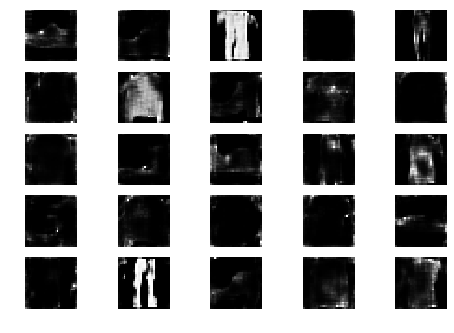

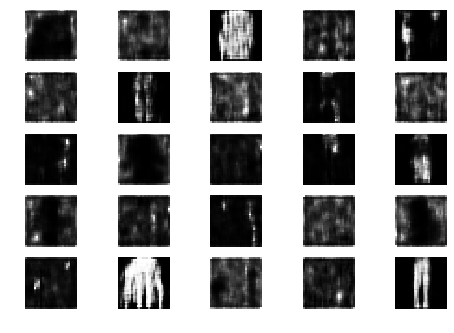

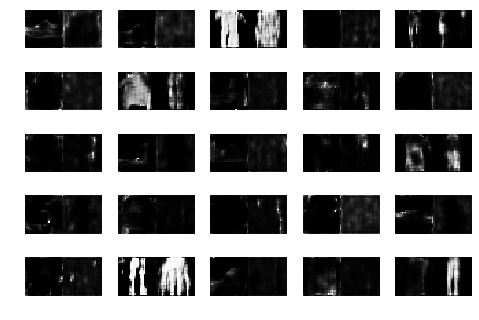

Epoch 1 Batch 201/1875 [D loss: 0.679706, acc.: 59.38%] [G loss: 1.249691]
Epoch 1 Batch 202/1875 [D loss: 0.845461, acc.: 34.38%] [G loss: 1.312833]
Epoch 1 Batch 203/1875 [D loss: 0.567507, acc.: 71.88%] [G loss: 1.024439]
Epoch 1 Batch 204/1875 [D loss: 0.705852, acc.: 62.50%] [G loss: 0.909211]
Epoch 1 Batch 205/1875 [D loss: 0.581394, acc.: 68.75%] [G loss: 0.898249]
Epoch 1 Batch 206/1875 [D loss: 0.828845, acc.: 43.75%] [G loss: 1.074772]
Epoch 1 Batch 207/1875 [D loss: 0.486365, acc.: 71.88%] [G loss: 1.117534]
Epoch 1 Batch 208/1875 [D loss: 0.564676, acc.: 68.75%] [G loss: 0.776089]
Epoch 1 Batch 209/1875 [D loss: 0.512416, acc.: 71.88%] [G loss: 0.970385]
Epoch 1 Batch 210/1875 [D loss: 0.421715, acc.: 81.25%] [G loss: 0.656082]
Epoch 1 Batch 211/1875 [D loss: 0.625206, acc.: 62.50%] [G loss: 1.200366]
Epoch 1 Batch 212/1875 [D loss: 0.548827, acc.: 68.75%] [G loss: 1.863871]
Epoch 1 Batch 213/1875 [D loss: 0.585824, acc.: 62.50%] [G loss: 1.536375]
Epoch 1 Batch 214/1875 [D

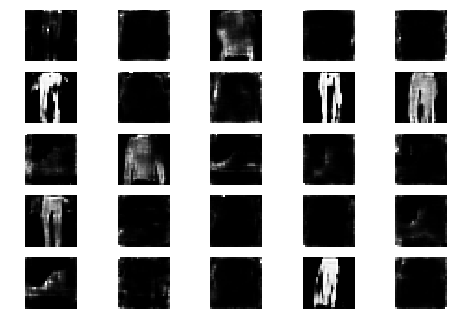

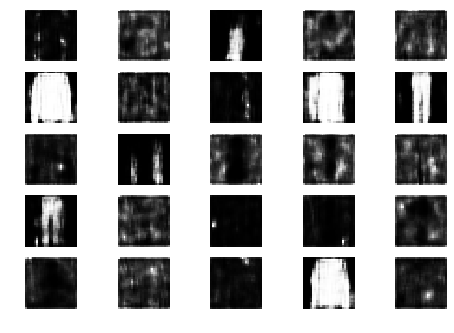

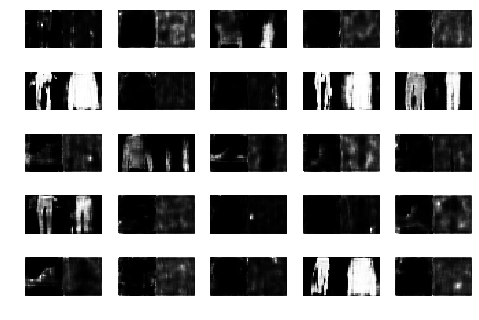

Epoch 1 Batch 301/1875 [D loss: 0.409206, acc.: 90.62%] [G loss: 1.351954]
Epoch 1 Batch 302/1875 [D loss: 0.577044, acc.: 62.50%] [G loss: 1.024771]
Epoch 1 Batch 303/1875 [D loss: 0.974109, acc.: 50.00%] [G loss: 1.181786]
Epoch 1 Batch 304/1875 [D loss: 0.579029, acc.: 65.62%] [G loss: 1.208721]
Epoch 1 Batch 305/1875 [D loss: 0.731728, acc.: 46.88%] [G loss: 1.216732]
Epoch 1 Batch 306/1875 [D loss: 0.662522, acc.: 65.62%] [G loss: 0.992841]
Epoch 1 Batch 307/1875 [D loss: 0.581179, acc.: 78.12%] [G loss: 1.491793]
Epoch 1 Batch 308/1875 [D loss: 0.467765, acc.: 81.25%] [G loss: 0.910451]
Epoch 1 Batch 309/1875 [D loss: 0.597504, acc.: 71.88%] [G loss: 0.948117]
Epoch 1 Batch 310/1875 [D loss: 0.620640, acc.: 59.38%] [G loss: 0.931994]
Epoch 1 Batch 311/1875 [D loss: 0.411808, acc.: 81.25%] [G loss: 0.944465]
Epoch 1 Batch 312/1875 [D loss: 0.665131, acc.: 62.50%] [G loss: 1.404365]
Epoch 1 Batch 313/1875 [D loss: 0.700289, acc.: 65.62%] [G loss: 1.310894]
Epoch 1 Batch 314/1875 [D

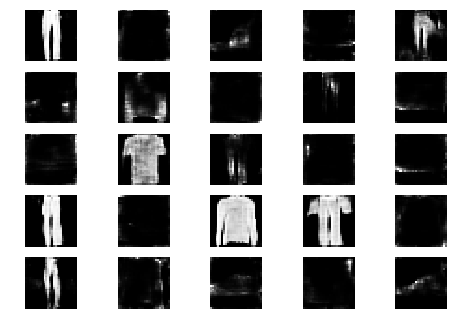

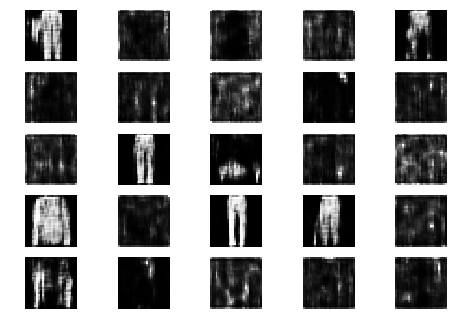

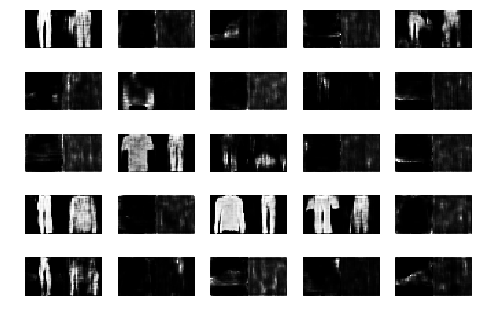

Epoch 1 Batch 401/1875 [D loss: 0.594622, acc.: 59.38%] [G loss: 1.531217]
Epoch 1 Batch 402/1875 [D loss: 0.607533, acc.: 62.50%] [G loss: 1.025095]
Epoch 1 Batch 403/1875 [D loss: 0.658248, acc.: 50.00%] [G loss: 1.468330]
Epoch 1 Batch 404/1875 [D loss: 0.671018, acc.: 62.50%] [G loss: 1.222789]
Epoch 1 Batch 405/1875 [D loss: 0.562714, acc.: 62.50%] [G loss: 1.114271]
Epoch 1 Batch 406/1875 [D loss: 0.658863, acc.: 65.62%] [G loss: 1.052139]
Epoch 1 Batch 407/1875 [D loss: 0.616820, acc.: 59.38%] [G loss: 1.055959]
Epoch 1 Batch 408/1875 [D loss: 0.563314, acc.: 71.88%] [G loss: 0.895308]
Epoch 1 Batch 409/1875 [D loss: 0.406039, acc.: 81.25%] [G loss: 0.821378]
Epoch 1 Batch 410/1875 [D loss: 0.624285, acc.: 68.75%] [G loss: 0.948551]
Epoch 1 Batch 411/1875 [D loss: 0.655974, acc.: 62.50%] [G loss: 1.018022]
Epoch 1 Batch 412/1875 [D loss: 0.710596, acc.: 59.38%] [G loss: 1.128693]
Epoch 1 Batch 413/1875 [D loss: 0.993794, acc.: 31.25%] [G loss: 1.667109]
Epoch 1 Batch 414/1875 [D

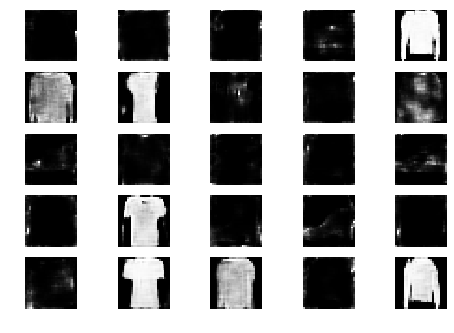

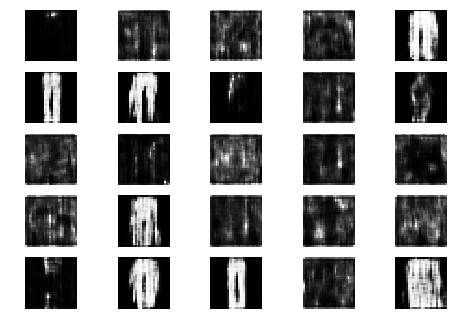

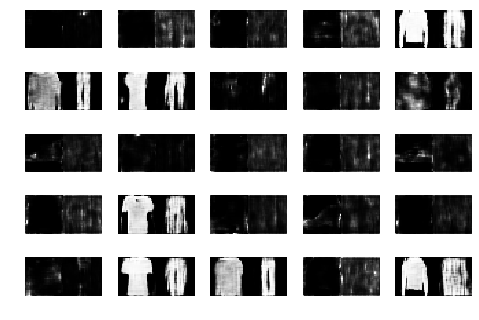

Epoch 1 Batch 501/1875 [D loss: 0.782713, acc.: 40.62%] [G loss: 1.213062]
Epoch 1 Batch 502/1875 [D loss: 0.704019, acc.: 65.62%] [G loss: 1.069474]
Epoch 1 Batch 503/1875 [D loss: 0.654079, acc.: 62.50%] [G loss: 1.273987]
Epoch 1 Batch 504/1875 [D loss: 0.544467, acc.: 71.88%] [G loss: 0.781266]
Epoch 1 Batch 505/1875 [D loss: 0.722946, acc.: 62.50%] [G loss: 0.958050]
Epoch 1 Batch 506/1875 [D loss: 0.725127, acc.: 40.62%] [G loss: 1.230372]
Epoch 1 Batch 507/1875 [D loss: 0.614246, acc.: 68.75%] [G loss: 1.155521]
Epoch 1 Batch 508/1875 [D loss: 0.533378, acc.: 71.88%] [G loss: 1.196206]
Epoch 1 Batch 509/1875 [D loss: 0.730901, acc.: 59.38%] [G loss: 1.223465]
Epoch 1 Batch 510/1875 [D loss: 0.799574, acc.: 56.25%] [G loss: 1.060149]
Epoch 1 Batch 511/1875 [D loss: 0.483069, acc.: 81.25%] [G loss: 1.472454]
Epoch 1 Batch 512/1875 [D loss: 0.670887, acc.: 53.12%] [G loss: 1.885323]
Epoch 1 Batch 513/1875 [D loss: 0.517605, acc.: 71.88%] [G loss: 1.620556]
Epoch 1 Batch 514/1875 [D

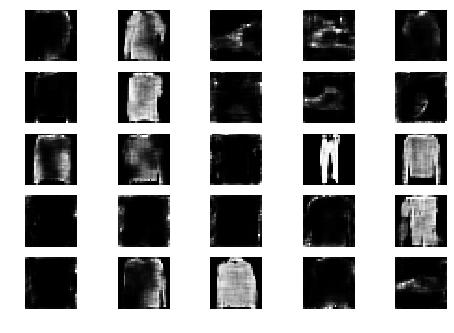

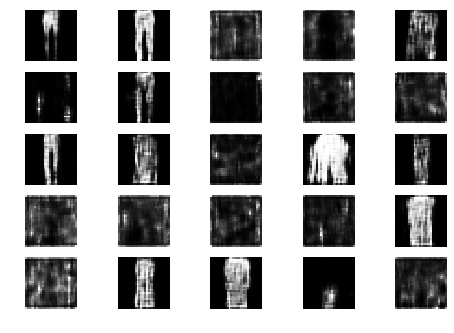

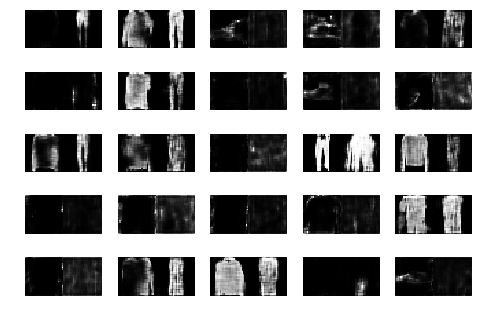

Epoch 1 Batch 601/1875 [D loss: 0.410804, acc.: 90.62%] [G loss: 1.260811]
Epoch 1 Batch 602/1875 [D loss: 0.588987, acc.: 68.75%] [G loss: 0.912239]
Epoch 1 Batch 603/1875 [D loss: 0.822809, acc.: 56.25%] [G loss: 1.205001]
Epoch 1 Batch 604/1875 [D loss: 0.328797, acc.: 87.50%] [G loss: 1.095937]
Epoch 1 Batch 605/1875 [D loss: 0.710143, acc.: 62.50%] [G loss: 1.636023]
Epoch 1 Batch 606/1875 [D loss: 0.537124, acc.: 71.88%] [G loss: 1.395962]
Epoch 1 Batch 607/1875 [D loss: 0.651527, acc.: 62.50%] [G loss: 1.066643]
Epoch 1 Batch 608/1875 [D loss: 0.838743, acc.: 28.12%] [G loss: 1.958644]
Epoch 1 Batch 609/1875 [D loss: 0.552503, acc.: 68.75%] [G loss: 1.462090]
Epoch 1 Batch 610/1875 [D loss: 0.740445, acc.: 43.75%] [G loss: 1.460836]
Epoch 1 Batch 611/1875 [D loss: 0.514324, acc.: 68.75%] [G loss: 1.037995]
Epoch 1 Batch 612/1875 [D loss: 0.509356, acc.: 87.50%] [G loss: 0.863968]
Epoch 1 Batch 613/1875 [D loss: 0.560018, acc.: 65.62%] [G loss: 1.135654]
Epoch 1 Batch 614/1875 [D

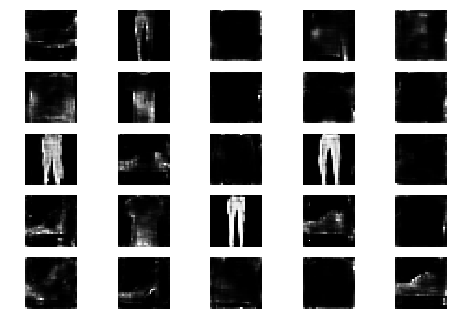

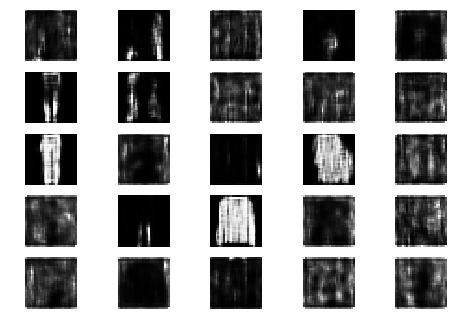

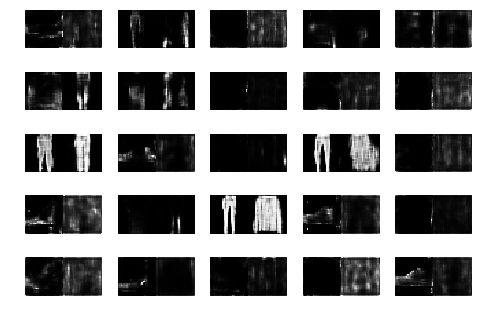

Epoch 1 Batch 701/1875 [D loss: 0.393613, acc.: 87.50%] [G loss: 1.695132]
Epoch 1 Batch 702/1875 [D loss: 0.825472, acc.: 50.00%] [G loss: 1.013269]
Epoch 1 Batch 703/1875 [D loss: 0.774028, acc.: 43.75%] [G loss: 1.535106]
Epoch 1 Batch 704/1875 [D loss: 0.552861, acc.: 78.12%] [G loss: 1.099638]
Epoch 1 Batch 705/1875 [D loss: 0.691134, acc.: 65.62%] [G loss: 1.214339]
Epoch 1 Batch 706/1875 [D loss: 0.562583, acc.: 65.62%] [G loss: 1.410709]
Epoch 1 Batch 707/1875 [D loss: 0.373075, acc.: 84.38%] [G loss: 1.181563]
Epoch 1 Batch 708/1875 [D loss: 0.769357, acc.: 53.12%] [G loss: 1.044965]
Epoch 1 Batch 709/1875 [D loss: 0.701758, acc.: 62.50%] [G loss: 1.193345]
Epoch 1 Batch 710/1875 [D loss: 0.800294, acc.: 46.88%] [G loss: 1.141148]
Epoch 1 Batch 711/1875 [D loss: 0.694865, acc.: 56.25%] [G loss: 1.411811]
Epoch 1 Batch 712/1875 [D loss: 0.772578, acc.: 59.38%] [G loss: 1.368614]
Epoch 1 Batch 713/1875 [D loss: 0.773849, acc.: 46.88%] [G loss: 1.482277]
Epoch 1 Batch 714/1875 [D

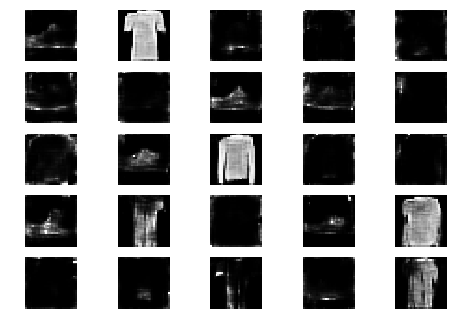

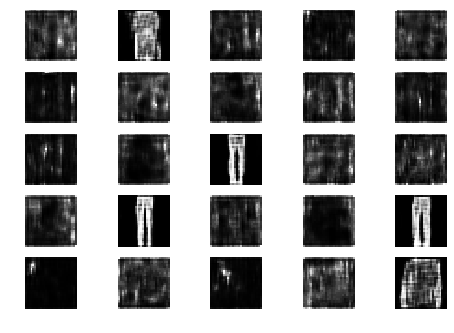

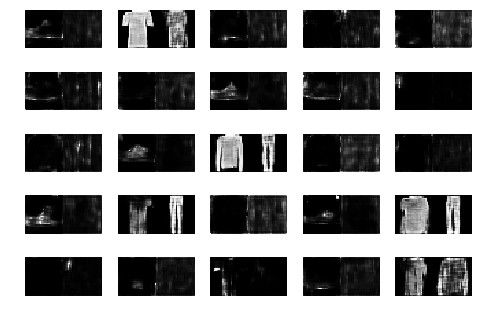

Epoch 1 Batch 801/1875 [D loss: 0.772910, acc.: 46.88%] [G loss: 1.403657]
Epoch 1 Batch 802/1875 [D loss: 0.608712, acc.: 75.00%] [G loss: 1.415184]
Epoch 1 Batch 803/1875 [D loss: 0.679104, acc.: 56.25%] [G loss: 1.346678]
Epoch 1 Batch 804/1875 [D loss: 0.686747, acc.: 53.12%] [G loss: 0.950875]
Epoch 1 Batch 805/1875 [D loss: 0.508077, acc.: 78.12%] [G loss: 1.299991]
Epoch 1 Batch 806/1875 [D loss: 0.730380, acc.: 53.12%] [G loss: 0.958622]
Epoch 1 Batch 807/1875 [D loss: 0.512120, acc.: 78.12%] [G loss: 1.112642]
Epoch 1 Batch 808/1875 [D loss: 0.787045, acc.: 43.75%] [G loss: 1.662072]
Epoch 1 Batch 809/1875 [D loss: 0.650367, acc.: 59.38%] [G loss: 1.779815]
Epoch 1 Batch 810/1875 [D loss: 0.510529, acc.: 75.00%] [G loss: 1.337202]
Epoch 1 Batch 811/1875 [D loss: 0.535897, acc.: 75.00%] [G loss: 1.115401]
Epoch 1 Batch 812/1875 [D loss: 0.475133, acc.: 87.50%] [G loss: 1.369002]
Epoch 1 Batch 813/1875 [D loss: 0.638398, acc.: 62.50%] [G loss: 1.524593]
Epoch 1 Batch 814/1875 [D

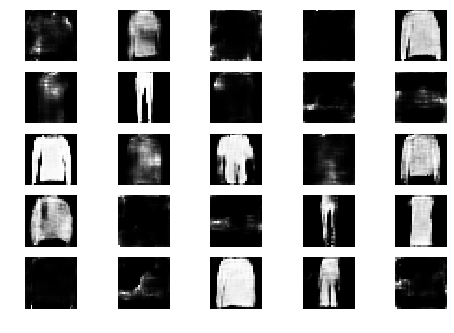

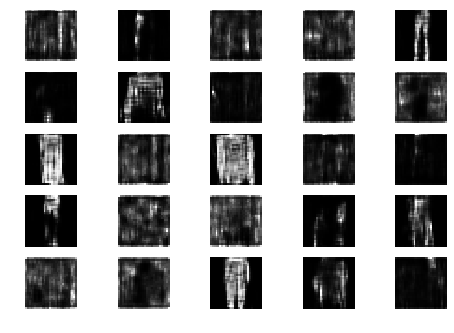

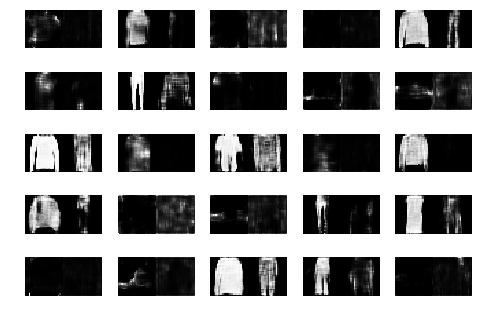

Epoch 1 Batch 901/1875 [D loss: 0.767225, acc.: 46.88%] [G loss: 1.106494]
Epoch 1 Batch 902/1875 [D loss: 0.314550, acc.: 81.25%] [G loss: 0.829218]
Epoch 1 Batch 903/1875 [D loss: 0.327751, acc.: 87.50%] [G loss: 0.947221]
Epoch 1 Batch 904/1875 [D loss: 0.500240, acc.: 68.75%] [G loss: 1.155234]
Epoch 1 Batch 905/1875 [D loss: 0.585158, acc.: 75.00%] [G loss: 1.156639]
Epoch 1 Batch 906/1875 [D loss: 0.457712, acc.: 84.38%] [G loss: 1.098613]
Epoch 1 Batch 907/1875 [D loss: 0.787973, acc.: 37.50%] [G loss: 1.284992]
Epoch 1 Batch 908/1875 [D loss: 0.631585, acc.: 53.12%] [G loss: 1.869828]
Epoch 1 Batch 909/1875 [D loss: 0.544270, acc.: 68.75%] [G loss: 1.099344]
Epoch 1 Batch 910/1875 [D loss: 0.356842, acc.: 87.50%] [G loss: 0.945880]
Epoch 1 Batch 911/1875 [D loss: 0.515111, acc.: 75.00%] [G loss: 0.752345]
Epoch 1 Batch 912/1875 [D loss: 0.724130, acc.: 40.62%] [G loss: 0.650341]
Epoch 1 Batch 913/1875 [D loss: 0.387153, acc.: 93.75%] [G loss: 0.888945]
Epoch 1 Batch 914/1875 [D

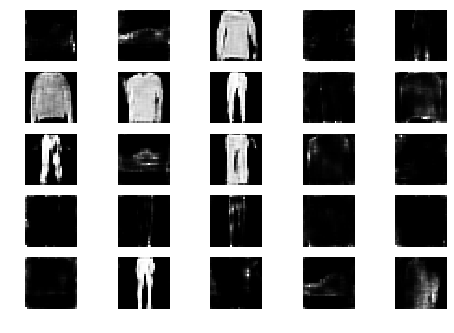

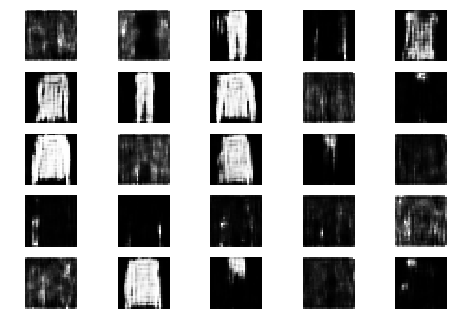

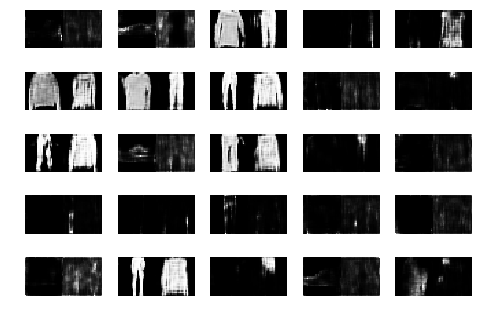

Epoch 1 Batch 1001/1875 [D loss: 0.242187, acc.: 100.00%] [G loss: 1.212129]
Epoch 1 Batch 1002/1875 [D loss: 0.544741, acc.: 84.38%] [G loss: 1.642642]
Epoch 1 Batch 1003/1875 [D loss: 0.411183, acc.: 84.38%] [G loss: 0.983631]
Epoch 1 Batch 1004/1875 [D loss: 0.937599, acc.: 25.00%] [G loss: 0.742204]
Epoch 1 Batch 1005/1875 [D loss: 0.716273, acc.: 62.50%] [G loss: 1.025266]
Epoch 1 Batch 1006/1875 [D loss: 0.737538, acc.: 68.75%] [G loss: 1.417812]
Epoch 1 Batch 1007/1875 [D loss: 0.582515, acc.: 65.62%] [G loss: 1.409710]
Epoch 1 Batch 1008/1875 [D loss: 0.516213, acc.: 71.88%] [G loss: 1.062106]
Epoch 1 Batch 1009/1875 [D loss: 0.577508, acc.: 71.88%] [G loss: 1.411671]
Epoch 1 Batch 1010/1875 [D loss: 0.593798, acc.: 59.38%] [G loss: 1.267211]
Epoch 1 Batch 1011/1875 [D loss: 0.656976, acc.: 50.00%] [G loss: 1.016881]
Epoch 1 Batch 1012/1875 [D loss: 0.633089, acc.: 81.25%] [G loss: 1.669076]
Epoch 1 Batch 1013/1875 [D loss: 0.570125, acc.: 78.12%] [G loss: 1.413676]
Epoch 1 Bat

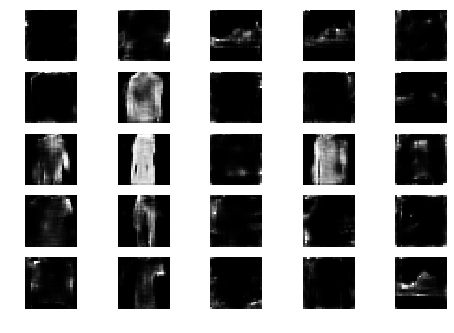

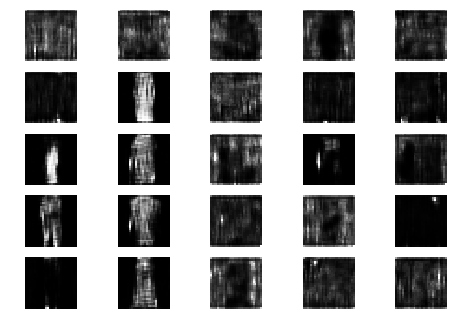

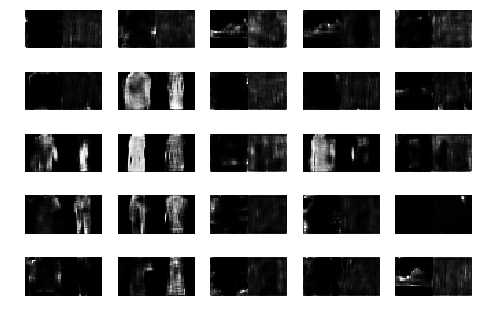

Epoch 1 Batch 1101/1875 [D loss: 0.544675, acc.: 71.88%] [G loss: 1.285946]
Epoch 1 Batch 1102/1875 [D loss: 0.629744, acc.: 53.12%] [G loss: 0.932119]
Epoch 1 Batch 1103/1875 [D loss: 0.607679, acc.: 78.12%] [G loss: 0.776239]
Epoch 1 Batch 1104/1875 [D loss: 0.536987, acc.: 75.00%] [G loss: 1.529445]
Epoch 1 Batch 1105/1875 [D loss: 0.760912, acc.: 53.12%] [G loss: 1.064841]
Epoch 1 Batch 1106/1875 [D loss: 0.793900, acc.: 56.25%] [G loss: 1.200859]
Epoch 1 Batch 1107/1875 [D loss: 0.443473, acc.: 84.38%] [G loss: 1.514367]
Epoch 1 Batch 1108/1875 [D loss: 0.758637, acc.: 59.38%] [G loss: 0.824459]
Epoch 1 Batch 1109/1875 [D loss: 0.964091, acc.: 43.75%] [G loss: 0.937342]
Epoch 1 Batch 1110/1875 [D loss: 0.745354, acc.: 56.25%] [G loss: 1.504041]
Epoch 1 Batch 1111/1875 [D loss: 0.481046, acc.: 78.12%] [G loss: 1.086172]
Epoch 1 Batch 1112/1875 [D loss: 0.512549, acc.: 71.88%] [G loss: 1.033528]
Epoch 1 Batch 1113/1875 [D loss: 0.688351, acc.: 59.38%] [G loss: 1.270732]
Epoch 1 Batc

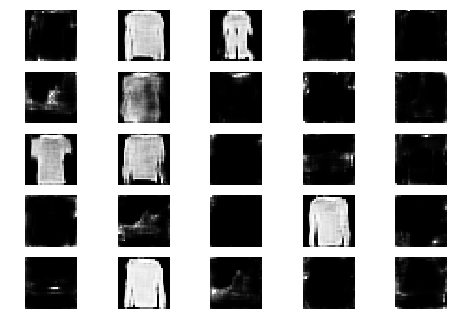

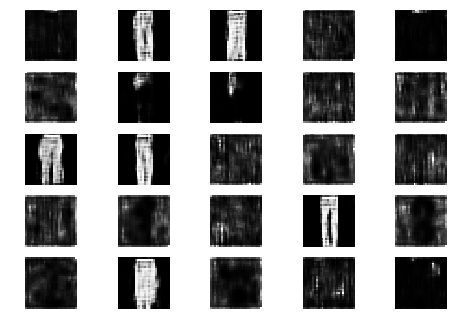

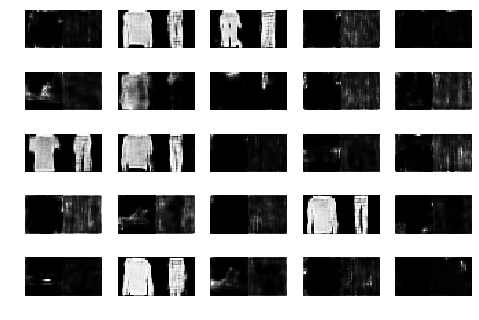

Epoch 1 Batch 1201/1875 [D loss: 0.513357, acc.: 75.00%] [G loss: 0.960150]
Epoch 1 Batch 1202/1875 [D loss: 0.512334, acc.: 71.88%] [G loss: 0.960246]
Epoch 1 Batch 1203/1875 [D loss: 0.952324, acc.: 46.88%] [G loss: 0.936353]
Epoch 1 Batch 1204/1875 [D loss: 0.867676, acc.: 50.00%] [G loss: 0.643342]
Epoch 1 Batch 1205/1875 [D loss: 0.729614, acc.: 59.38%] [G loss: 0.985728]
Epoch 1 Batch 1206/1875 [D loss: 0.651911, acc.: 50.00%] [G loss: 1.491430]
Epoch 1 Batch 1207/1875 [D loss: 0.534166, acc.: 68.75%] [G loss: 1.083994]
Epoch 1 Batch 1208/1875 [D loss: 0.784356, acc.: 46.88%] [G loss: 1.065170]
Epoch 1 Batch 1209/1875 [D loss: 0.578158, acc.: 62.50%] [G loss: 1.584986]
Epoch 1 Batch 1210/1875 [D loss: 0.535857, acc.: 62.50%] [G loss: 1.035636]
Epoch 1 Batch 1211/1875 [D loss: 0.652069, acc.: 62.50%] [G loss: 0.829260]
Epoch 1 Batch 1212/1875 [D loss: 0.376530, acc.: 84.38%] [G loss: 0.797753]
Epoch 1 Batch 1213/1875 [D loss: 0.604753, acc.: 62.50%] [G loss: 1.037224]
Epoch 1 Batc

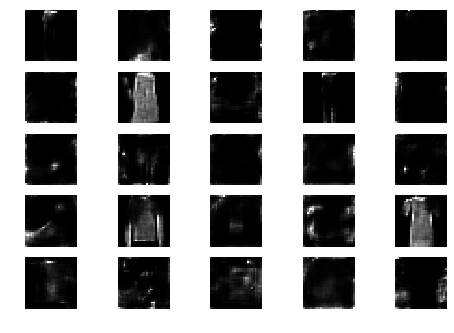

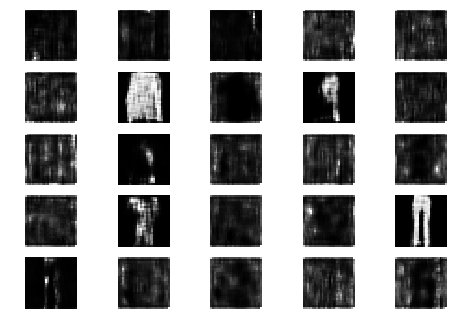

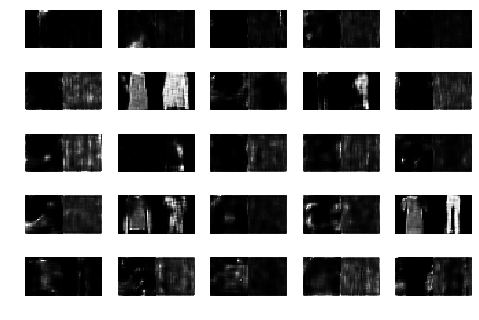

Epoch 1 Batch 1301/1875 [D loss: 0.721134, acc.: 62.50%] [G loss: 1.594091]
Epoch 1 Batch 1302/1875 [D loss: 0.538844, acc.: 75.00%] [G loss: 1.290201]
Epoch 1 Batch 1303/1875 [D loss: 0.659275, acc.: 62.50%] [G loss: 1.052637]
Epoch 1 Batch 1304/1875 [D loss: 0.602400, acc.: 62.50%] [G loss: 1.325503]
Epoch 1 Batch 1305/1875 [D loss: 0.779047, acc.: 43.75%] [G loss: 0.972835]
Epoch 1 Batch 1306/1875 [D loss: 0.495460, acc.: 81.25%] [G loss: 1.284245]
Epoch 1 Batch 1307/1875 [D loss: 0.558013, acc.: 71.88%] [G loss: 1.418566]
Epoch 1 Batch 1308/1875 [D loss: 0.500287, acc.: 75.00%] [G loss: 1.483620]
Epoch 1 Batch 1309/1875 [D loss: 0.941480, acc.: 40.62%] [G loss: 1.115640]
Epoch 1 Batch 1310/1875 [D loss: 0.626013, acc.: 71.88%] [G loss: 0.958442]
Epoch 1 Batch 1311/1875 [D loss: 0.515872, acc.: 68.75%] [G loss: 0.765952]
Epoch 1 Batch 1312/1875 [D loss: 0.604620, acc.: 65.62%] [G loss: 0.881791]
Epoch 1 Batch 1313/1875 [D loss: 0.754028, acc.: 50.00%] [G loss: 1.577423]
Epoch 1 Batc

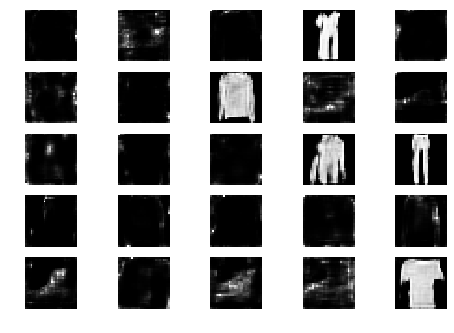

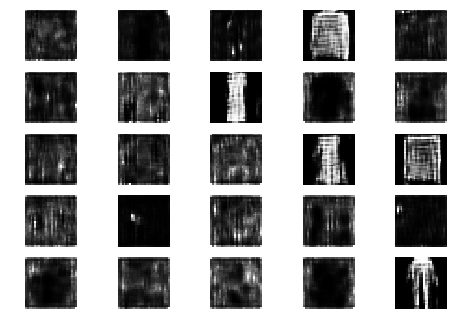

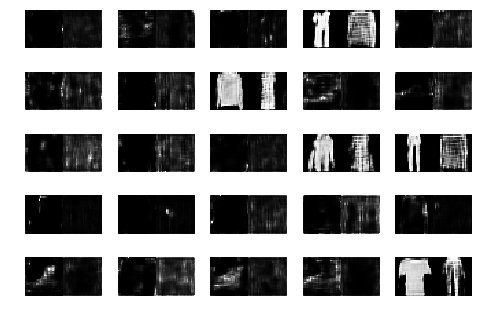

Epoch 1 Batch 1401/1875 [D loss: 0.700106, acc.: 53.12%] [G loss: 1.558408]
Epoch 1 Batch 1402/1875 [D loss: 0.893241, acc.: 56.25%] [G loss: 0.832546]
Epoch 1 Batch 1403/1875 [D loss: 0.694743, acc.: 56.25%] [G loss: 1.424799]
Epoch 1 Batch 1404/1875 [D loss: 0.484865, acc.: 84.38%] [G loss: 1.518919]
Epoch 1 Batch 1405/1875 [D loss: 0.318121, acc.: 87.50%] [G loss: 0.965069]
Epoch 1 Batch 1406/1875 [D loss: 0.750005, acc.: 53.12%] [G loss: 0.938903]
Epoch 1 Batch 1407/1875 [D loss: 0.507743, acc.: 78.12%] [G loss: 0.956971]
Epoch 1 Batch 1408/1875 [D loss: 0.431112, acc.: 81.25%] [G loss: 0.718872]
Epoch 1 Batch 1409/1875 [D loss: 0.676568, acc.: 62.50%] [G loss: 0.950269]
Epoch 1 Batch 1410/1875 [D loss: 0.499001, acc.: 65.62%] [G loss: 1.382557]
Epoch 1 Batch 1411/1875 [D loss: 0.422818, acc.: 87.50%] [G loss: 1.691748]
Epoch 1 Batch 1412/1875 [D loss: 0.537168, acc.: 78.12%] [G loss: 1.715911]
Epoch 1 Batch 1413/1875 [D loss: 0.640965, acc.: 62.50%] [G loss: 1.621805]
Epoch 1 Batc

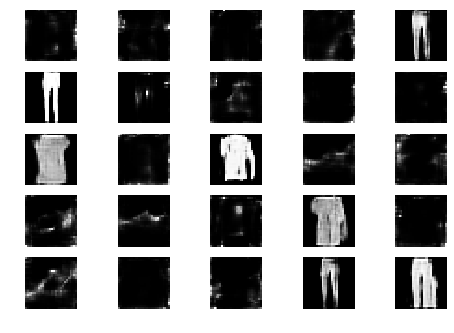

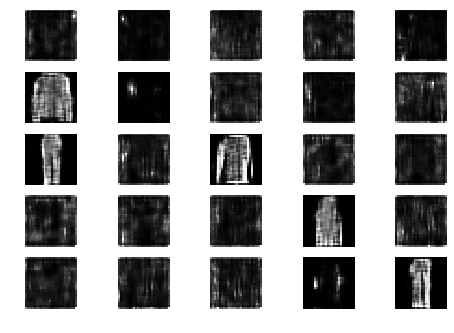

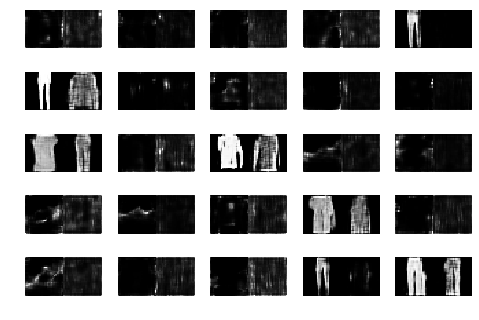

Epoch 1 Batch 1501/1875 [D loss: 0.314126, acc.: 93.75%] [G loss: 0.928731]
Epoch 1 Batch 1502/1875 [D loss: 0.440991, acc.: 78.12%] [G loss: 0.952812]
Epoch 1 Batch 1503/1875 [D loss: 0.701591, acc.: 59.38%] [G loss: 1.033937]
Epoch 1 Batch 1504/1875 [D loss: 0.577312, acc.: 68.75%] [G loss: 0.890595]
Epoch 1 Batch 1505/1875 [D loss: 0.594213, acc.: 68.75%] [G loss: 0.629111]
Epoch 1 Batch 1506/1875 [D loss: 0.648745, acc.: 65.62%] [G loss: 1.197410]
Epoch 1 Batch 1507/1875 [D loss: 0.578431, acc.: 68.75%] [G loss: 1.387520]
Epoch 1 Batch 1508/1875 [D loss: 0.512238, acc.: 65.62%] [G loss: 1.605822]
Epoch 1 Batch 1509/1875 [D loss: 0.786066, acc.: 68.75%] [G loss: 1.111097]
Epoch 1 Batch 1510/1875 [D loss: 0.402007, acc.: 84.38%] [G loss: 1.701264]
Epoch 1 Batch 1511/1875 [D loss: 0.557944, acc.: 62.50%] [G loss: 1.177804]
Epoch 1 Batch 1512/1875 [D loss: 0.778125, acc.: 59.38%] [G loss: 0.800598]
Epoch 1 Batch 1513/1875 [D loss: 0.457029, acc.: 87.50%] [G loss: 1.304292]
Epoch 1 Batc

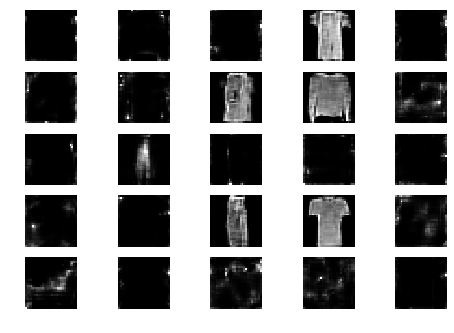

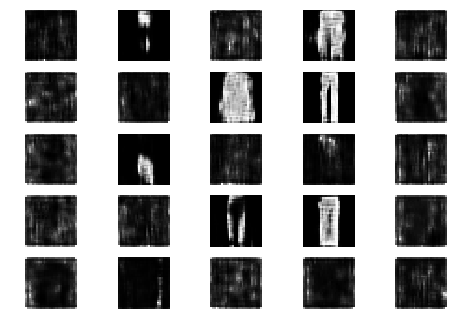

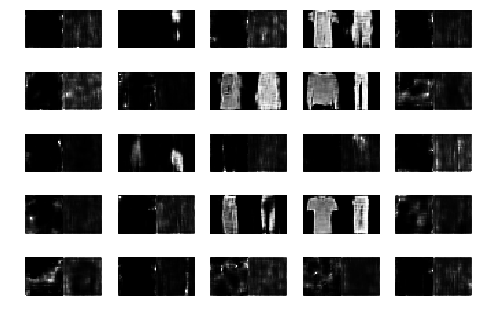

Epoch 1 Batch 1601/1875 [D loss: 0.463348, acc.: 90.62%] [G loss: 1.855695]
Epoch 1 Batch 1602/1875 [D loss: 0.423891, acc.: 84.38%] [G loss: 1.453061]
Epoch 1 Batch 1603/1875 [D loss: 0.957432, acc.: 28.12%] [G loss: 1.234076]
Epoch 1 Batch 1604/1875 [D loss: 0.399865, acc.: 90.62%] [G loss: 1.155069]
Epoch 1 Batch 1605/1875 [D loss: 0.563032, acc.: 75.00%] [G loss: 1.126008]
Epoch 1 Batch 1606/1875 [D loss: 0.685484, acc.: 53.12%] [G loss: 1.658261]
Epoch 1 Batch 1607/1875 [D loss: 0.819378, acc.: 56.25%] [G loss: 1.452593]
Epoch 1 Batch 1608/1875 [D loss: 0.792758, acc.: 56.25%] [G loss: 1.222938]
Epoch 1 Batch 1609/1875 [D loss: 0.574130, acc.: 62.50%] [G loss: 1.438004]
Epoch 1 Batch 1610/1875 [D loss: 0.889557, acc.: 31.25%] [G loss: 1.135886]
Epoch 1 Batch 1611/1875 [D loss: 0.678374, acc.: 46.88%] [G loss: 1.293401]
Epoch 1 Batch 1612/1875 [D loss: 0.662006, acc.: 75.00%] [G loss: 1.312125]
Epoch 1 Batch 1613/1875 [D loss: 0.666111, acc.: 65.62%] [G loss: 1.213171]
Epoch 1 Batc

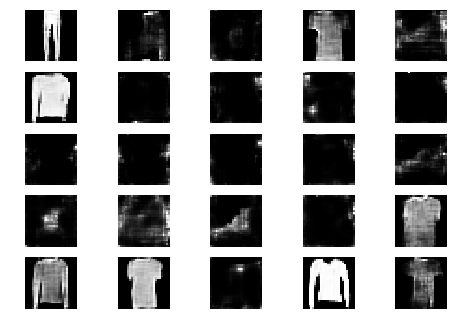

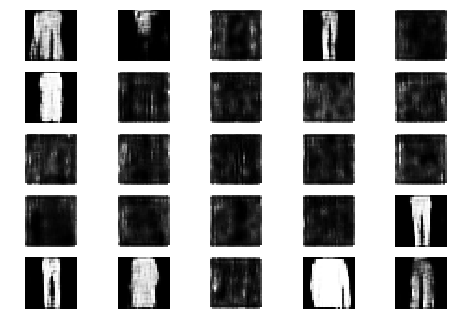

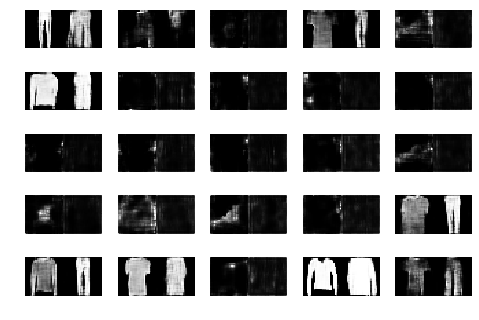

Epoch 1 Batch 1701/1875 [D loss: 0.354046, acc.: 93.75%] [G loss: 1.350731]
Epoch 1 Batch 1702/1875 [D loss: 0.730660, acc.: 56.25%] [G loss: 0.742681]
Epoch 1 Batch 1703/1875 [D loss: 0.802155, acc.: 46.88%] [G loss: 1.358047]
Epoch 1 Batch 1704/1875 [D loss: 0.531565, acc.: 71.88%] [G loss: 1.314164]
Epoch 1 Batch 1705/1875 [D loss: 0.943075, acc.: 34.38%] [G loss: 1.674180]
Epoch 1 Batch 1706/1875 [D loss: 0.593950, acc.: 68.75%] [G loss: 1.592873]
Epoch 1 Batch 1707/1875 [D loss: 0.649588, acc.: 71.88%] [G loss: 1.425087]
Epoch 1 Batch 1708/1875 [D loss: 0.383041, acc.: 90.62%] [G loss: 1.309576]
Epoch 1 Batch 1709/1875 [D loss: 0.649606, acc.: 68.75%] [G loss: 1.618038]
Epoch 1 Batch 1710/1875 [D loss: 0.424583, acc.: 87.50%] [G loss: 1.048694]
Epoch 1 Batch 1711/1875 [D loss: 0.424037, acc.: 84.38%] [G loss: 0.781902]
Epoch 1 Batch 1712/1875 [D loss: 0.561466, acc.: 75.00%] [G loss: 1.972823]
Epoch 1 Batch 1713/1875 [D loss: 0.298656, acc.: 93.75%] [G loss: 1.392571]
Epoch 1 Batc

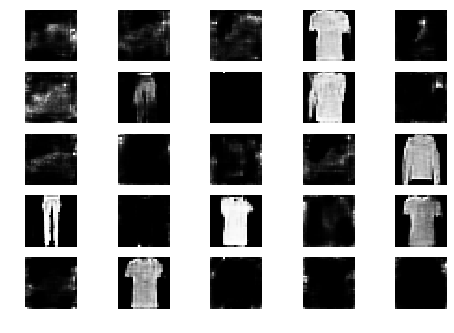

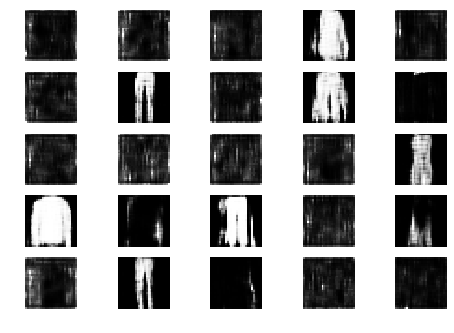

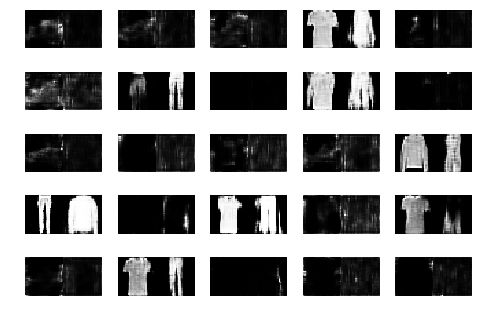

Epoch 1 Batch 1801/1875 [D loss: 0.557635, acc.: 71.88%] [G loss: 1.062109]
Epoch 1 Batch 1802/1875 [D loss: 0.353233, acc.: 90.62%] [G loss: 1.909936]
Epoch 1 Batch 1803/1875 [D loss: 0.518881, acc.: 81.25%] [G loss: 1.268648]
Epoch 1 Batch 1804/1875 [D loss: 0.538278, acc.: 87.50%] [G loss: 1.370767]
Epoch 1 Batch 1805/1875 [D loss: 0.652049, acc.: 62.50%] [G loss: 0.957253]
Epoch 1 Batch 1806/1875 [D loss: 0.889670, acc.: 46.88%] [G loss: 1.194556]
Epoch 1 Batch 1807/1875 [D loss: 0.579262, acc.: 68.75%] [G loss: 1.294038]
Epoch 1 Batch 1808/1875 [D loss: 0.480926, acc.: 71.88%] [G loss: 1.236181]
Epoch 1 Batch 1809/1875 [D loss: 0.242473, acc.: 93.75%] [G loss: 1.560061]
Epoch 1 Batch 1810/1875 [D loss: 0.472572, acc.: 75.00%] [G loss: 1.308639]
Epoch 1 Batch 1811/1875 [D loss: 0.576443, acc.: 59.38%] [G loss: 1.330553]
Epoch 1 Batch 1812/1875 [D loss: 0.430898, acc.: 75.00%] [G loss: 1.513785]
Epoch 1 Batch 1813/1875 [D loss: 1.406259, acc.: 12.50%] [G loss: 1.739040]
Epoch 1 Batc

In [36]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=1, modeltotrain = 3)

In [0]:

generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 2 ,  loadpretrainedweights=True)




    
    

    


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=1, modeltotrain = 3)

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=64, save_interval=1, modeltotrain = 3)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=4, batch_size=64, save_interval=1, modeltotrain = 3)

In [0]:
plotamodel(combined, showdetails=False )
files.download('modelsmall.png')

In [0]:
!rm -rf generator1fminst.h5



In [0]:

generator1.save('generator1fminst.h5')



In [0]:
files.download('generator1fminst.h5')


In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 2 ,  loadpretrainedweights=False)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=20, modeltotrain=3)

In [0]:
!rm -rf generator2fmnist.h5


In [0]:

generator2.save('generator2fmnist.h5')

In [0]:
!ls -al


In [0]:
files.download('generator2fmnist.h5')

In [0]:
##!wget https://github.com/rajagopalmotivate/try1/raw/master/generatorTrainedepoch2git.h5

In [0]:
!rm -rf generator1fminst.h5
!rm -rf generator2fminst.h5

In [0]:
!ls -all

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/generator1fminst.h5

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/generator2fminst.h5

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
plotamodel(combined, showdetails=False )
files.download('modelsmall.png')

In [0]:
plotamodel(combined, showdetails=True )
files.download('model.png')

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=1)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=2)

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=3)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=3)

In [0]:
plotamodel(combined)
files.download('model.png')

In [0]:
!rm -rf generatorTrainedepoch2.h5

generator1.save('generator1fminst.h5')

!rm -rf generator2Trainedepoch2.h5

generator2.save('generator2fminst.h5')


In [0]:
generator1 = generator1.load_weights('generator1fmnist.h5')


In [0]:
generator2 = generator2.load_weights('generator1fminst.h5')




In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1)

In [0]:
generator1.save('generatorTrained1epoch4.h5')

In [0]:
files.download('generator1fmnist.h5')

In [0]:
files.download('generator2fmnist.h5')

In [0]:
##files.download('discriminator1.h5')

In [0]:
##files.download('combined1.h5')

In [0]:
#generator1 = load_model('generator1.h5')
#discriminator1 = load_model('discriminator1.h5')
#combined1 = load_model('combined1.h5')

